Alright let's start with uploading the dataset and then analyzing the data set

In [2]:
!pip install tensorflow keras 

In [3]:
import tensorflow as tf

In [4]:
strategy = tf.distribute.MirroredStrategy()

In [5]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Let's upload the dataset on our google drive and then use it here after mounting the drive in our colab notebook

In [7]:
folder_path = "/kaggle/input/japan-data-set/data"

In [8]:
df_demand = pd.read_csv(f"{folder_path}/electricity_demand/demand.csv", parse_dates=['datetime'], index_col='datetime')

In [9]:
df_demand.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


actual_performance(10  000 kW)
datetime                                           
2021-01-01 00:00:00                   1571      NaN
2021-01-01 01:00:00                   1492      NaN
2021-01-01 02:00:00                   1453      NaN
2021-01-01 03:00:00                   1412      NaN
2021-01-01 04:00:00                   1358      NaN

In [10]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2021-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   actual_performance(10  26280 non-null  int64  
 1   000 kW)                0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 615.9 KB


In [11]:
print(df_demand.columns)

Index(['actual_performance(10', '000 kW)'], dtype='object')


In [12]:
combined_name = df_demand.columns[0] + df_demand.columns[1]

In [13]:
df_demand = df_demand.rename(columns={df_demand.columns[0]: combined_name})

In [14]:
df_demand

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


actual_performance(10000 kW)  000 kW)
datetime                                                  
2021-01-01 00:00:00                          1571      NaN
2021-01-01 01:00:00                          1492      NaN
2021-01-01 02:00:00                          1453      NaN
2021-01-01 03:00:00                          1412      NaN
2021-01-01 04:00:00                          1358      NaN
...                                           ...      ...
2023-12-31 19:00:00                          1427      NaN
2023-12-31 20:00:00                          1392      NaN
2023-12-31 21:00:00                          1348      NaN
2023-12-31 22:00:00                          1288      NaN
2023-12-31 23:00:00                          1258      NaN

[26280 rows x 2 columns]

In [15]:
df_demand = df_demand.drop(columns=df_demand.columns[1])

In [16]:
df_demand.describe()

actual_performance(10000 kW)
count                  26280.000000
mean                    1616.426180
std                      328.186899
min                      955.000000
25%                     1359.000000
50%                     1572.000000
75%                     1816.000000
max                     2827.000000

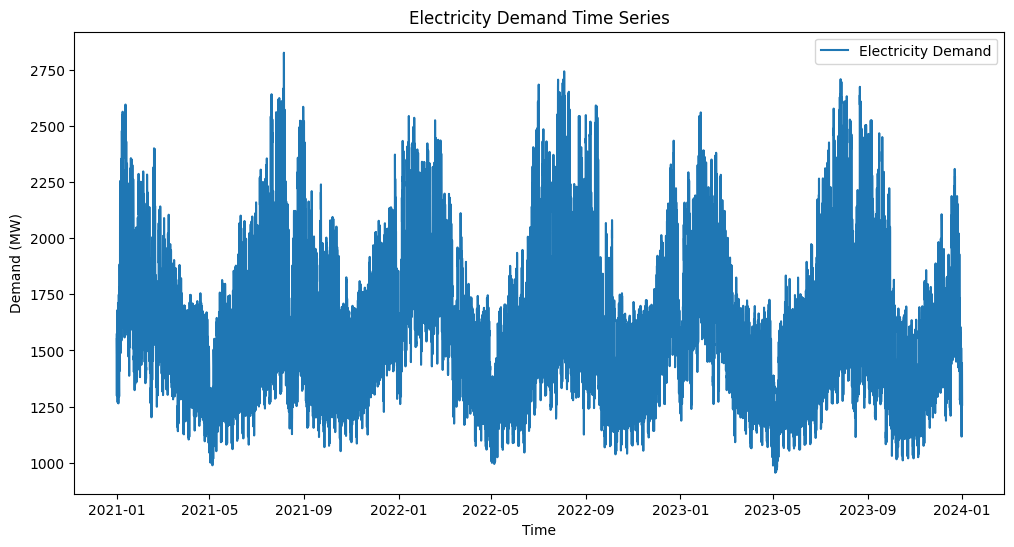

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df_demand.index, df_demand["actual_performance(10000 kW)"], label='Electricity Demand')
plt.xlabel('Time')
plt.ylabel('Demand (MW)')
plt.title('Electricity Demand Time Series')
plt.legend()
plt.show()

In [18]:
#now checking out the Weather files

In [19]:
import glob
import os

In [20]:
weather_folder_path = f"{folder_path }/Weather"

In [21]:
csv_files = glob.glob(os.path.join(weather_folder_path, '*.csv'))
file_names = [os.path.basename(file) for file in csv_files]

In [22]:
print("Files found:", file_names)

Files found: ['kyoto.csv', 'wakayama.csv', 'toyooka.csv', 'nara.csv', 'kobe.csv', 'shionomisaki.csv', 'osaka.csv', 'hikone.csv']


In [23]:
print(len(file_names))

8


In [24]:
df_hikone = pd.read_csv(csv_files[0], parse_dates=['datetime'], index_col='datetime')

In [25]:
df_hikone

precipitation  temperature  dew_point_temperature  \
datetime                                                                 
2021-01-01 00:00:00            0.0          0.6                   -5.0   
2021-01-01 01:00:00            0.0          0.5                   -4.9   
2021-01-01 02:00:00            0.0          0.2                   -5.0   
2021-01-01 03:00:00            0.0          0.0                   -4.6   
2021-01-01 04:00:00            0.0          0.0                   -4.6   
...                            ...          ...                    ...   
2023-12-31 19:00:00            0.0         10.4                    5.6   
2023-12-31 20:00:00            0.0          9.4                    4.6   
2023-12-31 21:00:00            1.0          8.6                    5.5   
2023-12-31 22:00:00            4.5          8.1                    6.2   
2023-12-31 23:00:00            0.5          9.1                    5.7   

                     humidity  wind_speed wind_direction  snowfall  
datetime                                                            
2021-01-01 00:00:00      66.0         2.1            南南西       0.0  
2021-01-01 01:00:00      67.0         1.5            南南西       0.0  
2021-01-01 02:00:00      68.0         0.9             北東       0.0  
2021-01-01 03:00:00      71.0         1.8              南       0.0  
2021-01-01 04:00:00      71.0         2.3             北西       0.0  
...                       ...         ...            ...       ...  
2023-12-31 19:00:00      72.0         2.0              西       0.0  
2023-12-31 20:00:00      72.0         2.6            西北西       0.0  
2023-12-31 21:00:00      81.0         3.0             北西       0.0  
2023-12-31 22:00:00      88.0         1.7              西       0.0  
2023-12-31 23:00:00      79.0         1.6             北西       0.0  

[26280 rows x 7 columns]

In [26]:
unique_Wind_dir = df_hikone["wind_direction"].unique()

In [27]:
print(unique_Wind_dir)

['南南西' '北東' '南' '北西' '西' '北北西' '西南西' '西北西' '南西' '北' '南東' '北北東' '東北東' '東'
 '南南東' '東南東' '静穏' '×' '北北西 )']


In [28]:
print(len(unique_Wind_dir))

19


In [29]:
group_mapping = {
    '南': 'S',
    '南南西': 'SSW',
    '南南東': 'SSE',
    '西': 'W',
    '北西': 'NW',
    '南西': 'SW',
    '西北西': 'WNW',
    '西南西': 'WSW',
    '南東': 'SE',
    '北北西': 'NNW',
    '北東': 'NE',
    '東南東': 'ESE',
    '東': 'E',
    '北': 'N',
    '北北東': 'NNE',
    '東北東': 'ENE',
    '静穏': 'Calm',
    '×': '×'
}

In [30]:
df_hikone["wind_direction"] = df_hikone["wind_direction"].map(group_mapping)

In [31]:
df_hikone

precipitation  temperature  dew_point_temperature  \
datetime                                                                 
2021-01-01 00:00:00            0.0          0.6                   -5.0   
2021-01-01 01:00:00            0.0          0.5                   -4.9   
2021-01-01 02:00:00            0.0          0.2                   -5.0   
2021-01-01 03:00:00            0.0          0.0                   -4.6   
2021-01-01 04:00:00            0.0          0.0                   -4.6   
...                            ...          ...                    ...   
2023-12-31 19:00:00            0.0         10.4                    5.6   
2023-12-31 20:00:00            0.0          9.4                    4.6   
2023-12-31 21:00:00            1.0          8.6                    5.5   
2023-12-31 22:00:00            4.5          8.1                    6.2   
2023-12-31 23:00:00            0.5          9.1                    5.7   

                     humidity  wind_speed wind_direction  snowfall  
datetime                                                            
2021-01-01 00:00:00      66.0         2.1            SSW       0.0  
2021-01-01 01:00:00      67.0         1.5            SSW       0.0  
2021-01-01 02:00:00      68.0         0.9             NE       0.0  
2021-01-01 03:00:00      71.0         1.8              S       0.0  
2021-01-01 04:00:00      71.0         2.3             NW       0.0  
...                       ...         ...            ...       ...  
2023-12-31 19:00:00      72.0         2.0              W       0.0  
2023-12-31 20:00:00      72.0         2.6            WNW       0.0  
2023-12-31 21:00:00      81.0         3.0             NW       0.0  
2023-12-31 22:00:00      88.0         1.7              W       0.0  
2023-12-31 23:00:00      79.0         1.6             NW       0.0  

[26280 rows x 7 columns]

In [32]:
wind_order_main = [
    'N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
    'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'
]

In [33]:
wind_value_mapping = {}
for i, direction in enumerate(wind_order_main):
    value = (np.cos((i / 16) * 2 * np.pi) + 1) / 4 + 0.5
    wind_value_mapping[direction] = value

In [34]:
wind_value_mapping['Calm'] = 0    #calm is set to 0.
wind_value_mapping['×'] = np.nan

In [35]:
dfs = []

In [36]:
for file in csv_files:
    city = os.path.basename(file).split('.')[0]
    df = pd.read_csv(file, parse_dates=['datetime'], index_col='datetime')
    print(f"Processing file: {city} and the number of columns is {len(df.columns)}")
    if 'wind_direction' in df.columns:
        df['wind_direction'] = df['wind_direction'].map(group_mapping)
        df['wind_direction'] = df['wind_direction'].map(wind_value_mapping)
    df = df.add_prefix(f"{city}_")
    dfs.append(df)

Processing file: kyoto and the number of columns is 7
Processing file: wakayama and the number of columns is 7
Processing file: toyooka and the number of columns is 7
Processing file: nara and the number of columns is 7
Processing file: kobe and the number of columns is 7
Processing file: shionomisaki and the number of columns is 7
Processing file: osaka and the number of columns is 7
Processing file: hikone and the number of columns is 7


In [37]:
df_combined = pd.concat(dfs, axis=1)

In [38]:
print(df_combined.head())

                     kyoto_precipitation  kyoto_temperature  \
datetime                                                      
2021-01-01 00:00:00                  0.0                0.6   
2021-01-01 01:00:00                  0.0                0.5   
2021-01-01 02:00:00                  0.0                0.2   
2021-01-01 03:00:00                  0.0                0.0   
2021-01-01 04:00:00                  0.0                0.0   

                     kyoto_dew_point_temperature  kyoto_humidity  \
datetime                                                           
2021-01-01 00:00:00                         -5.0            66.0   
2021-01-01 01:00:00                         -4.9            67.0   
2021-01-01 02:00:00                         -5.0            68.0   
2021-01-01 03:00:00                         -4.6            71.0   
2021-01-01 04:00:00                         -4.6            71.0   

                     kyoto_wind_speed  kyoto_wind_direction  kyoto_snowfall  \
da

In [39]:
#there are 56 columns as 8 locations and 7 columns for each of them

In [40]:
df = pd.concat([df_demand, df_combined], axis=1)

In [41]:
df.head()

actual_performance(10000 kW)  kyoto_precipitation  \
datetime                                                                 
2021-01-01 00:00:00                          1571                  0.0   
2021-01-01 01:00:00                          1492                  0.0   
2021-01-01 02:00:00                          1453                  0.0   
2021-01-01 03:00:00                          1412                  0.0   
2021-01-01 04:00:00                          1358                  0.0   

                     kyoto_temperature  kyoto_dew_point_temperature  \
datetime                                                              
2021-01-01 00:00:00                0.6                         -5.0   
2021-01-01 01:00:00                0.5                         -4.9   
2021-01-01 02:00:00                0.2                         -5.0   
2021-01-01 03:00:00                0.0                         -4.6   
2021-01-01 04:00:00                0.0                         -4.6   

                     kyoto_humidity  kyoto_wind_speed  kyoto_wind_direction  \
datetime                                                                      
2021-01-01 00:00:00            66.0               2.1              0.519030   
2021-01-01 01:00:00            67.0               1.5              0.519030   
2021-01-01 02:00:00            68.0               0.9              0.926777   
2021-01-01 03:00:00            71.0               1.8              0.500000   
2021-01-01 04:00:00            71.0               2.3              0.926777   

                     kyoto_snowfall  wakayama_precipitation  \
datetime                                                      
2021-01-01 00:00:00             0.0                     0.0   
2021-01-01 01:00:00             0.0                     0.0   
2021-01-01 02:00:00             0.0                     0.0   
2021-01-01 03:00:00             0.0                     0.0   
2021-01-01 04:00:00             0.0                     0.0   

                     wakayama_temperature  ...  osaka_wind_speed  \
datetime                                   ...                     
2021-01-01 00:00:00                   2.3  ...               4.8   
2021-01-01 01:00:00                   3.1  ...               4.0   
2021-01-01 02:00:00                   3.9  ...               3.2   
2021-01-01 03:00:00                   3.9  ...               3.5   
2021-01-01 04:00:00                   3.9  ...               2.8   

                     osaka_wind_direction  osaka_snowfall  \
datetime                                                    
2021-01-01 00:00:00              0.654329             0.0   
2021-01-01 01:00:00              0.654329             0.0   
2021-01-01 02:00:00              0.750000             0.0   
2021-01-01 03:00:00              0.654329             0.0   
2021-01-01 04:00:00              0.573223             0.0   

                     hikone_precipitation  hikone_temperature  \
datetime                                                        
2021-01-01 00:00:00                   0.0                 0.3   
2021-01-01 01:00:00                   0.0                 0.3   
2021-01-01 02:00:00                   0.0                 0.0   
2021-01-01 03:00:00                   0.0                -0.8   
2021-01-01 04:00:00                   0.0                 0.2   

                     hikone_dew_point_temperature  hikone_humidity  \
datetime                                                             
2021-01-01 00:00:00                          -4.9             68.0   
2021-01-01 01:00:00                          -4.7             69.0   
2021-01-01 02:00:00                          -4.8             70.0   
2021-01-01 03:00:00                          -4.7             75.0   
2021-01-01 04:00:00                          -4.0             73.0   

                     hikone_wind_speed  hikone_wind_direction  hikone_snowfall  
datetime                                                                   

In [42]:
df.isna().sum()

actual_performance(10000 kW)              0
kyoto_precipitation                       0
kyoto_temperature                         0
kyoto_dew_point_temperature               0
kyoto_humidity                            0
kyoto_wind_speed                          0
kyoto_wind_direction                      4
kyoto_snowfall                            0
wakayama_precipitation                    0
wakayama_temperature                      0
wakayama_dew_point_temperature            0
wakayama_humidity                         0
wakayama_wind_speed                       0
wakayama_wind_direction                   3
wakayama_snowfall                         0
toyooka_precipitation                     0
toyooka_temperature                       0
toyooka_dew_point_temperature             0
toyooka_humidity                          0
toyooka_wind_speed                        0
toyooka_wind_direction                    9
toyooka_snowfall                          0
nara_precipitation              

In [43]:
#as we can see all the values of place nara are nan so we cant take them for prediction and will have to exclude that

In [44]:
df = df.dropna(axis=1, thresh=len(df) - len(df)//100)

In [45]:
# we could have used a KNN inputer here to fill the na values

In [46]:
df = df.fillna(0)

In [47]:
df.describe()

actual_performance(10000 kW)  kyoto_precipitation  kyoto_temperature  \
count                  26280.000000         26280.000000       26280.000000   
mean                    1616.426180             0.184113          17.088577   
std                      328.186899             1.290495           9.197685   
min                      955.000000             0.000000          -3.900000   
25%                     1359.000000             0.000000           9.300000   
50%                     1572.000000             0.000000          17.200000   
75%                     1816.000000             0.000000          24.900000   
max                     2827.000000            64.000000          38.100000   

       kyoto_dew_point_temperature  kyoto_humidity  kyoto_wind_speed  \
count                 26280.000000    26280.000000      26280.000000   
mean                     10.375472       66.880251          2.007728   
std                       9.038824       16.448775          1.230424   
min                     -15.800000        9.000000          0.000000   
25%                       2.300000       55.000000          1.100000   
50%                      10.200000       69.000000          1.700000   
75%                      19.000000       80.000000          2.700000   
max                      26.200000       99.000000         12.000000   

       kyoto_wind_direction  kyoto_snowfall  wakayama_precipitation  \
count          26280.000000    26280.000000            26280.000000   
mean               0.802391        0.001903                0.152188   
std                0.187428        0.069218                1.059075   
min                0.000000        0.000000                0.000000   
25%                0.654329        0.000000                0.000000   
50%                0.845671        0.000000                0.000000   
75%                0.980970        0.000000                0.000000   
max                1.000000        7.000000               41.500000   

       wakayama_temperature  ...  osaka_wind_speed  osaka_wind_direction  \
count          26280.000000  ...      26280.000000          26280.000000   
mean              17.553554  ...          2.338082              0.791074   
std                8.402013  ...          1.269907              0.198544   
min               -1.600000  ...          0.000000              0.000000   
25%               10.600000  ...          1.400000              0.573223   
50%               17.900000  ...          2.100000              0.845671   
75%               24.900000  ...          3.100000              0.980970   
max               36.700000  ...         12.300000              1.000000   

       osaka_snowfall  hikone_precipitation  hikone_temperature  \
count         26280.0          26280.000000        26280.000000   
mean              0.0              0.177759           15.942127   
std               0.0              0.973132            9.035720   
min               0.0              0.000000           -4.200000   
25%               0.0              0.000000            8.200000   
50%               0.0              0.000000           15.800000   
75%               0.0              0.000000           23.900000   
max               0.0             37.500000           36.400000   

       hikone_dew_point_temperature  hikone_humidity  hikone_wind_speed  \
count                  26280.000000     26280.000000       26280.000000   
mean                      11.345837        75.445358           2.881001   
std                        8.774529        14.289113           2.067910   
min                      -17.400000         0.000000           0.000000   
25%                        3.600000        66.000000           1.400000   
50%                       11.000000        77.000000           2.200000   
75%                       19.700000        86.000000           3.800000   
max                       27.000000       100.000000          15.800000   

       hikone_wind_direction  hikone_snow

In [48]:
corr_matrix = df.corr()

In [49]:
cols = corr_matrix.columns.tolist()
if 'actual_performance(10000 kW)' in cols:
    cols = ['actual_performance(10000 kW)'] + [col for col in cols if col != 'actual_performance(10000 kW)']
    corr_matrix = corr_matrix.loc[cols, cols]

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


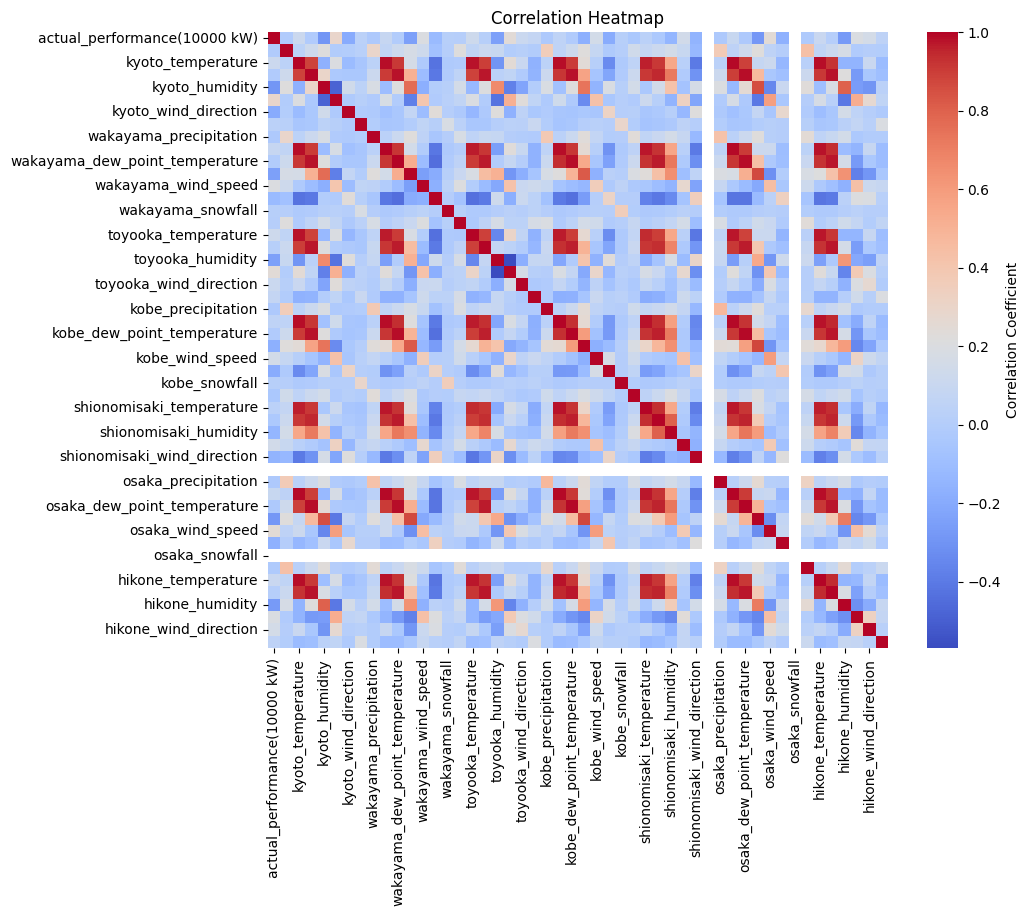

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap')
plt.show()

In [69]:
!pip install -U xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 7.3 MB/s eta 0:00:000:00:0100:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3


In [70]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [114]:
X = df.drop(columns=['actual_performance(10000 kW)'])
y = df['actual_performance(10000 kW)']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

In [100]:
xgb_model = XGBRegressor(
    tree_method = "hist", 
    device = "cuda",
    predictor='gpu_predictor',
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    random_state=42,
    objective='reg:squarederror')

In [101]:
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

In [81]:
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

In [82]:
print(best_params)
print(best_rmse)

{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
176.26016448550413


In [83]:
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [84]:
y_pred = final_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Test RMSE: 171.07797371344614


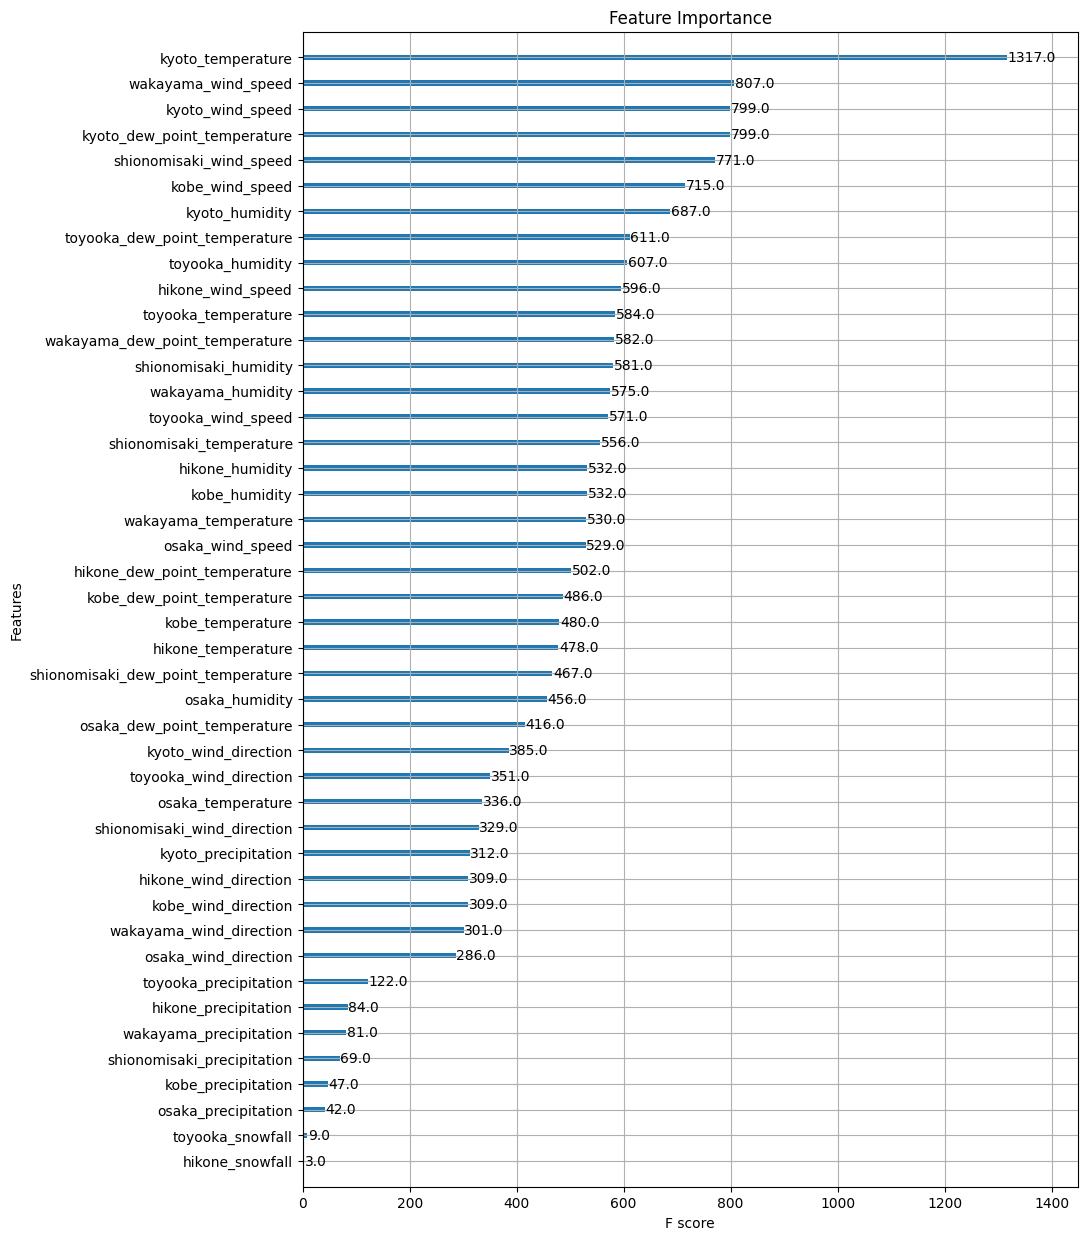

In [85]:
ax = xgboost.plot_importance(final_model)
fig = ax.figure
fig.set_size_inches(10, 15)
plt.title("Feature Importance")
plt.show()

In [51]:
cols_to_drop = [
    col for col in df.columns
    if any(keyword in col for keyword in ["snowfall", "precipitation", "wind_direction"])
]

In [52]:
df_reduced = df.drop(columns=cols_to_drop)

In [53]:
df_reduced

actual_performance(10000 kW)  kyoto_temperature  \
datetime                                                               
2021-01-01 00:00:00                          1571                0.6   
2021-01-01 01:00:00                          1492                0.5   
2021-01-01 02:00:00                          1453                0.2   
2021-01-01 03:00:00                          1412                0.0   
2021-01-01 04:00:00                          1358                0.0   
...                                           ...                ...   
2023-12-31 19:00:00                          1427               10.4   
2023-12-31 20:00:00                          1392                9.4   
2023-12-31 21:00:00                          1348                8.6   
2023-12-31 22:00:00                          1288                8.1   
2023-12-31 23:00:00                          1258                9.1   

                     kyoto_dew_point_temperature  kyoto_humidity  \
datetime                                                           
2021-01-01 00:00:00                         -5.0            66.0   
2021-01-01 01:00:00                         -4.9            67.0   
2021-01-01 02:00:00                         -5.0            68.0   
2021-01-01 03:00:00                         -4.6            71.0   
2021-01-01 04:00:00                         -4.6            71.0   
...                                          ...             ...   
2023-12-31 19:00:00                          5.6            72.0   
2023-12-31 20:00:00                          4.6            72.0   
2023-12-31 21:00:00                          5.5            81.0   
2023-12-31 22:00:00                          6.2            88.0   
2023-12-31 23:00:00                          5.7            79.0   

                     kyoto_wind_speed  wakayama_temperature  \
datetime                                                      
2021-01-01 00:00:00               2.1                   2.3   
2021-01-01 01:00:00               1.5                   3.1   
2021-01-01 02:00:00               0.9                   3.9   
2021-01-01 03:00:00               1.8                   3.9   
2021-01-01 04:00:00               2.3                   3.9   
...                               ...                   ...   
2023-12-31 19:00:00               2.0                  11.3   
2023-12-31 20:00:00               2.6                  11.0   
2023-12-31 21:00:00               3.0                  10.8   
2023-12-31 22:00:00               1.7                  10.2   
2023-12-31 23:00:00               1.6                  10.2   

                     wakayama_dew_point_temperature  wakayama_humidity  \
datetime                                                                 
2021-01-01 00:00:00                            -1.0               79.0   
2021-01-01 01:00:00                            -2.2               68.0   
2021-01-01 02:00:00                            -4.1               56.0   
2021-01-01 03:00:00                            -3.4               59.0   
2021-01-01 04:00:00                            -3.1               60.0   
...                                             ...                ...   
2023-12-31 19:00:00                             4.3               62.0   
2023-12-31 20:00:00                             4.5               64.0   
2023-12-31 21:00:00                             5.2               68.0   
2023-12-31 22:00:00                             5.0               70.0   
2023-12-31 23:00:00                             5.6               73.0   

                     wakayama_wind_speed  toyooka_temperature  ...  \
datetime                                                       ...   
2021-01-01 00:00:00                  2.6                 -0.3  ...   
2021-01-01 01:00:00                  1.5                 -0.2  ...   
2021-01-01 02:00:00                  6.2                  0.4  ...   
2021-01-01 03:00:00                  5.6                  0.1  ...

In [89]:
X = df_reduced.drop(columns=['actual_performance(10000 kW)'])
y = df_reduced['actual_performance(10000 kW)']

In [90]:
X

kyoto_temperature  kyoto_dew_point_temperature  \
datetime                                                              
2021-01-01 00:00:00                0.6                         -5.0   
2021-01-01 01:00:00                0.5                         -4.9   
2021-01-01 02:00:00                0.2                         -5.0   
2021-01-01 03:00:00                0.0                         -4.6   
2021-01-01 04:00:00                0.0                         -4.6   
...                                ...                          ...   
2023-12-31 19:00:00               10.4                          5.6   
2023-12-31 20:00:00                9.4                          4.6   
2023-12-31 21:00:00                8.6                          5.5   
2023-12-31 22:00:00                8.1                          6.2   
2023-12-31 23:00:00                9.1                          5.7   

                     kyoto_humidity  kyoto_wind_speed  wakayama_temperature  \
datetime                                                                      
2021-01-01 00:00:00            66.0               2.1                   2.3   
2021-01-01 01:00:00            67.0               1.5                   3.1   
2021-01-01 02:00:00            68.0               0.9                   3.9   
2021-01-01 03:00:00            71.0               1.8                   3.9   
2021-01-01 04:00:00            71.0               2.3                   3.9   
...                             ...               ...                   ...   
2023-12-31 19:00:00            72.0               2.0                  11.3   
2023-12-31 20:00:00            72.0               2.6                  11.0   
2023-12-31 21:00:00            81.0               3.0                  10.8   
2023-12-31 22:00:00            88.0               1.7                  10.2   
2023-12-31 23:00:00            79.0               1.6                  10.2   

                     wakayama_dew_point_temperature  wakayama_humidity  \
datetime                                                                 
2021-01-01 00:00:00                            -1.0               79.0   
2021-01-01 01:00:00                            -2.2               68.0   
2021-01-01 02:00:00                            -4.1               56.0   
2021-01-01 03:00:00                            -3.4               59.0   
2021-01-01 04:00:00                            -3.1               60.0   
...                                             ...                ...   
2023-12-31 19:00:00                             4.3               62.0   
2023-12-31 20:00:00                             4.5               64.0   
2023-12-31 21:00:00                             5.2               68.0   
2023-12-31 22:00:00                             5.0               70.0   
2023-12-31 23:00:00                             5.6               73.0   

                     wakayama_wind_speed  toyooka_temperature  \
datetime                                                        
2021-01-01 00:00:00                  2.6                 -0.3   
2021-01-01 01:00:00                  1.5                 -0.2   
2021-01-01 02:00:00                  6.2                  0.4   
2021-01-01 03:00:00                  5.6                  0.1   
2021-01-01 04:00:00                  5.8                  0.2   
...                                  ...                  ...   
2023-12-31 19:00:00                  7.6                  7.9   
2023-12-31 20:00:00                  3.4                  9.9   
2023-12-31 21:00:00                  7.8                  9.9   
2023-12-31 22:00:00                  7.2                  9.2   
2023-12-31 23:00:00                  5.3                  7.7   

                     toyooka_dew_point_temperature  ...  \
datetime                                            ...   
2021-01-01 00:00:00                           -0.4  ...   
2021-01-01 01:00:00                           -0.3  ...   
2021-01-01 02:00:00     

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

In [92]:
y_train

datetime
2023-06-28 12:00:00    2098
2023-11-14 20:00:00    1627
2023-06-07 18:00:00    1584
2021-11-30 14:00:00    1792
2023-05-21 17:00:00    1389
                       ... 
2022-07-01 19:00:00    2247
2023-03-30 16:00:00    1523
2022-02-15 05:00:00    1658
2022-03-26 23:00:00    1277
2021-04-24 20:00:00    1377
Name: actual_performance(10000 kW), Length: 21024, dtype: int64

In [93]:
X_train

kyoto_temperature  kyoto_dew_point_temperature  \
datetime                                                              
2023-06-28 12:00:00               32.0                         22.4   
2023-11-14 20:00:00                9.6                          6.5   
2023-06-07 18:00:00               25.3                         17.0   
2021-11-30 14:00:00               17.2                          8.1   
2023-05-21 17:00:00               27.5                         12.7   
...                                ...                          ...   
2022-07-01 19:00:00               33.1                         18.1   
2023-03-30 16:00:00               20.4                         -2.0   
2022-02-15 05:00:00                1.6                         -0.8   
2022-03-26 23:00:00               15.7                         14.2   
2021-04-24 20:00:00               18.1                          9.5   

                     kyoto_humidity  kyoto_wind_speed  wakayama_temperature  \
datetime                                                                      
2023-06-28 12:00:00            57.0               3.8                  29.1   
2023-11-14 20:00:00            81.0               1.9                   9.4   
2023-06-07 18:00:00            60.0               2.4                  24.4   
2021-11-30 14:00:00            55.0               3.8                  19.4   
2023-05-21 17:00:00            40.0               2.7                  22.8   
...                             ...               ...                   ...   
2022-07-01 19:00:00            41.0               1.7                  27.7   
2023-03-30 16:00:00            22.0               1.9                  17.8   
2022-02-15 05:00:00            84.0               1.0                   2.4   
2022-03-26 23:00:00            91.0               2.0                  16.4   
2021-04-24 20:00:00            57.0               0.9                  17.2   

                     wakayama_dew_point_temperature  wakayama_humidity  \
datetime                                                                 
2023-06-28 12:00:00                            24.0               74.0   
2023-11-14 20:00:00                             6.3               81.0   
2023-06-07 18:00:00                            15.4               57.0   
2021-11-30 14:00:00                             8.4               49.0   
2023-05-21 17:00:00                            18.4               76.0   
...                                             ...                ...   
2022-07-01 19:00:00                            24.1               81.0   
2023-03-30 16:00:00                             0.5               31.0   
2022-02-15 05:00:00                             0.8               89.0   
2022-03-26 23:00:00                            14.4               88.0   
2021-04-24 20:00:00                             9.9               62.0   

                     wakayama_wind_speed  toyooka_temperature  \
datetime                                                        
2023-06-28 12:00:00                  6.9                 31.9   
2023-11-14 20:00:00                  4.3                 10.1   
2023-06-07 18:00:00                  1.9                 21.8   
2021-11-30 14:00:00                  7.9                 17.7   
2023-05-21 17:00:00                  3.6                 24.1   
...                                  ...                  ...   
2022-07-01 19:00:00                  5.9                 27.8   
2023-03-30 16:00:00                  2.7                 17.7   
2022-02-15 05:00:00                  2.9                 -0.6   
2022-03-26 23:00:00                  7.5                 13.9   
2021-04-24 20:00:00                  3.9                 15.5   

                     toyooka_dew_point_temperature  ...  \
datetime                                            ...   
2023-06-28 12:00:00                           20.8  ...   
2023-11-14 20:00:00                            8.5  ...   
2023-06-07 18:00:00     

In [94]:
y_test.sort_index(inplace=True)

In [95]:
X_test.sort_index(inplace=True)

In [96]:
y_test

datetime
2021-01-01 04:00:00    1358
2021-01-01 07:00:00    1401
2021-01-01 12:00:00    1506
2021-01-01 18:00:00    1679
2021-01-01 22:00:00    1566
                       ... 
2023-12-31 11:00:00    1350
2023-12-31 12:00:00    1335
2023-12-31 16:00:00    1315
2023-12-31 22:00:00    1288
2023-12-31 23:00:00    1258
Name: actual_performance(10000 kW), Length: 5256, dtype: int64

In [97]:
X_test

kyoto_temperature  kyoto_dew_point_temperature  \
datetime                                                              
2021-01-01 04:00:00                0.0                         -4.6   
2021-01-01 07:00:00                0.2                         -4.2   
2021-01-01 12:00:00                4.5                         -2.4   
2021-01-01 18:00:00                2.8                         -1.2   
2021-01-01 22:00:00                1.5                         -3.7   
...                                ...                          ...   
2023-12-31 11:00:00               11.0                          7.7   
2023-12-31 12:00:00               10.8                          7.1   
2023-12-31 16:00:00               12.6                          7.1   
2023-12-31 22:00:00                8.1                          6.2   
2023-12-31 23:00:00                9.1                          5.7   

                     kyoto_humidity  kyoto_wind_speed  wakayama_temperature  \
datetime                                                                      
2021-01-01 04:00:00            71.0               2.3                   3.9   
2021-01-01 07:00:00            72.0               1.0                   4.4   
2021-01-01 12:00:00            61.0               2.8                   6.5   
2021-01-01 18:00:00            75.0               1.0                   5.3   
2021-01-01 22:00:00            68.0               1.6                   4.5   
...                             ...               ...                   ...   
2023-12-31 11:00:00            80.0               0.4                  13.4   
2023-12-31 12:00:00            78.0               1.4                  12.7   
2023-12-31 16:00:00            69.0               4.5                  14.4   
2023-12-31 22:00:00            88.0               1.7                  10.2   
2023-12-31 23:00:00            79.0               1.6                  10.2   

                     wakayama_dew_point_temperature  wakayama_humidity  \
datetime                                                                 
2021-01-01 04:00:00                            -3.1               60.0   
2021-01-01 07:00:00                            -4.6               52.0   
2021-01-01 12:00:00                            -4.9               44.0   
2021-01-01 18:00:00                            -4.5               49.0   
2021-01-01 22:00:00                            -4.0               54.0   
...                                             ...                ...   
2023-12-31 11:00:00                            11.3               87.0   
2023-12-31 12:00:00                            10.9               89.0   
2023-12-31 16:00:00                             4.7               52.0   
2023-12-31 22:00:00                             5.0               70.0   
2023-12-31 23:00:00                             5.6               73.0   

                     wakayama_wind_speed  toyooka_temperature  \
datetime                                                        
2021-01-01 04:00:00                  5.8                  0.2   
2021-01-01 07:00:00                  5.6                  1.1   
2021-01-01 12:00:00                  5.4                  1.7   
2021-01-01 18:00:00                  3.7                  0.9   
2021-01-01 22:00:00                  4.6                  0.2   
...                                  ...                  ...   
2023-12-31 11:00:00                  2.0                 11.5   
2023-12-31 12:00:00                  2.9                 11.0   
2023-12-31 16:00:00                 10.1                 10.1   
2023-12-31 22:00:00                  7.2                  9.2   
2023-12-31 23:00:00                  5.3                  7.7   

                     toyooka_dew_point_temperature  ...  \
datetime                                            ...   
2021-01-01 04:00:00                            0.2  ...   
2021-01-01 07:00:00                            0.4  ...   
2021-01-01 12:00:00     

In [102]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:32:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1,...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=200,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor='gpu_predictor', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [103]:
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

In [104]:
print(best_params)
print(best_rmse)

{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
181.96094127876282


In [105]:
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
y_pred = final_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Test RMSE: 173.41690162044526


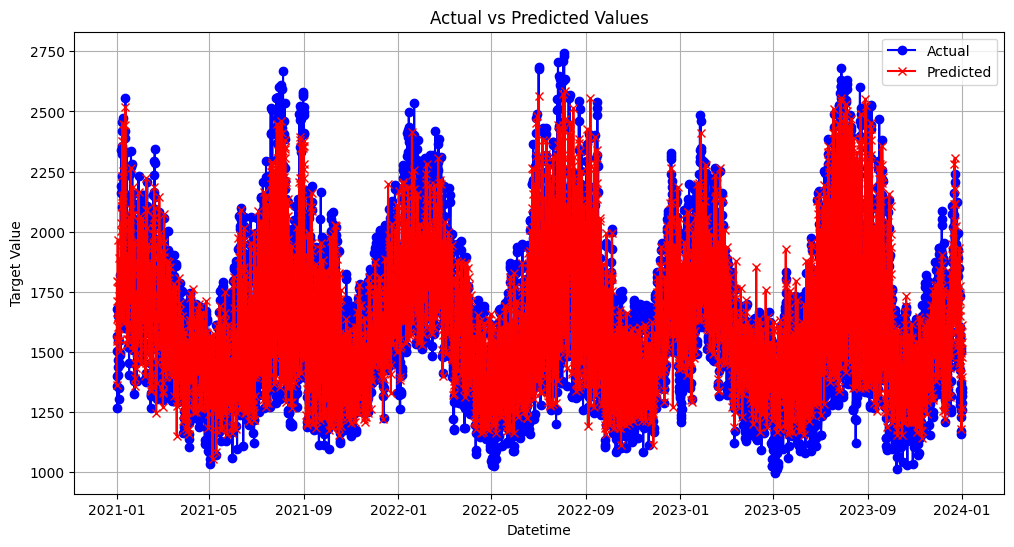

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', marker='x')
plt.title("Actual vs Predicted Values")
plt.xlabel("Datetime")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()

let's plot first 100

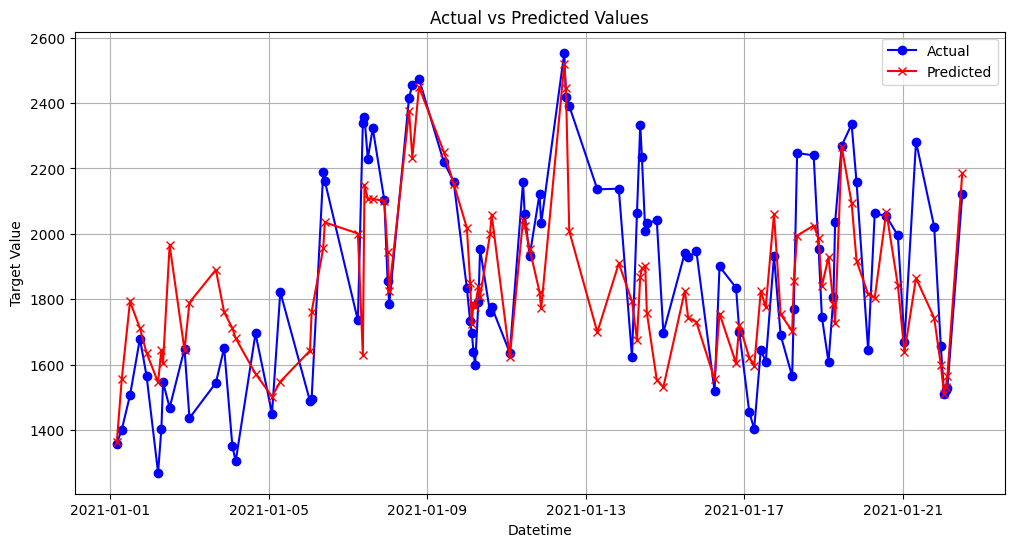

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100].index, y_test[:100], label='Actual', color='blue', marker='o')
plt.plot(y_test[:100].index, y_pred[:100], label='Predicted', color='red', marker='x')
plt.title("Actual vs Predicted Values")
plt.xlabel("Datetime")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()

As we can see the model preformance is not that good looking but lets check the difference in values and percentage error in these models and then check

In [109]:
residuals = y_test - y_pred

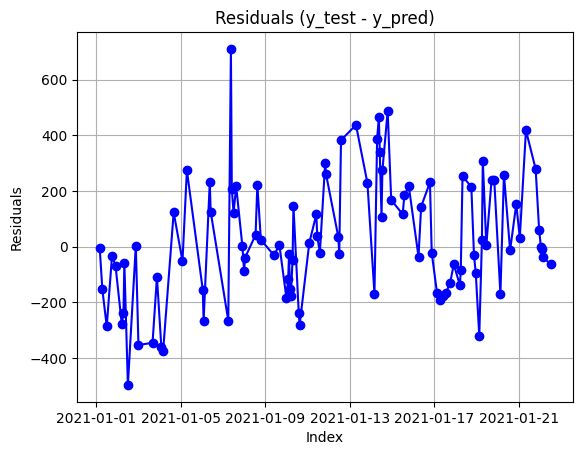

In [110]:
plt.figure()
plt.plot(residuals[:100], marker='o', linestyle='-', color='blue')
plt.title("Residuals (y_test - y_pred)")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

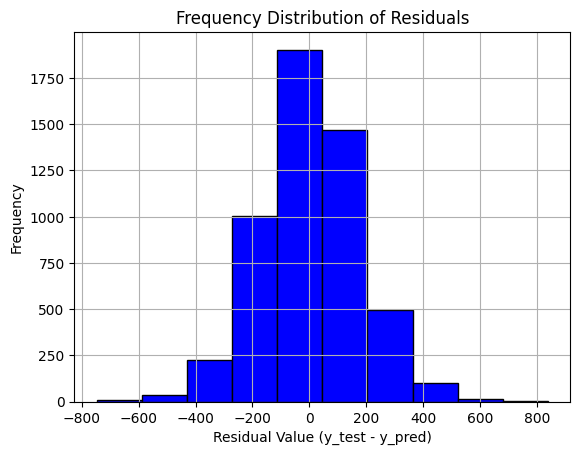

In [111]:
plt.figure()
plt.hist(residuals, bins=10, edgecolor='black', color='blue')
plt.title("Frequency Distribution of Residuals")
plt.xlabel("Residual Value (y_test - y_pred)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [112]:
percentage_error = np.abs(residuals) / (np.abs(y_test) + 1e-8) * 100

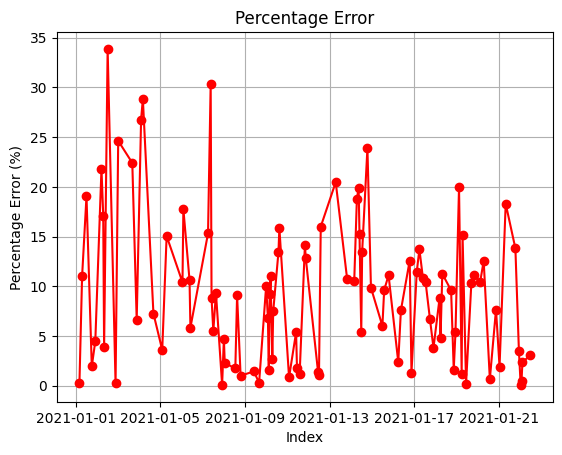

In [113]:
plt.figure()
plt.plot(percentage_error[:100], marker='o', linestyle='-', color='red')
plt.title("Percentage Error")
plt.xlabel("Index")
plt.ylabel("Percentage Error (%)")
plt.grid(True)
plt.show()

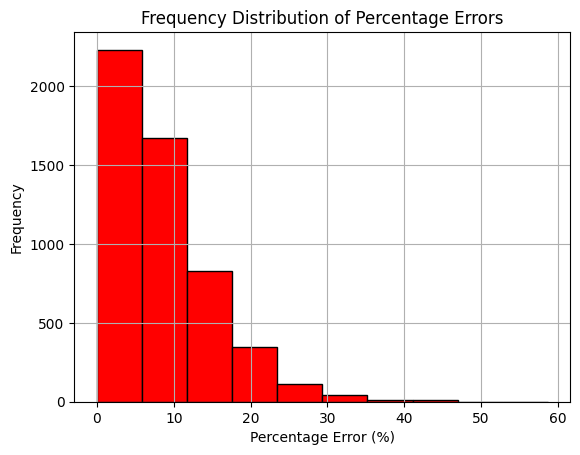

In [114]:
plt.figure()
plt.hist(percentage_error, bins=10, edgecolor='black', color='red')
plt.title("Frequency Distribution of Percentage Errors")
plt.xlabel("Percentage Error (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [115]:
#most of the error lies within 20% range

In [116]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [117]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_reduced)
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit_transform(df_reduced[['actual_performance(10000 kW)']])

array([[0.32905983],
       [0.28685897],
       [0.26602564],
       ...,
       [0.2099359 ],
       [0.17788462],
       [0.16185897]])

In [88]:
target_index = df_reduced.columns.get_loc("actual_performance(10000 kW)")

In [119]:
def create_dataset_multivariate(dataset, look_back, target_index):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i : i + look_back, :])
        y.append(dataset[i + look_back, target_index])
    return np.array(X), np.array(y)

In [89]:
look_back = 24
X, y = create_dataset_multivariate(scaled_data, look_back, target_index)

In [121]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [122]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (21004, 24, 29)
y_train shape: (21004,)


In [123]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(loss="mean_squared_error", optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [124]:
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [125]:
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0271 - val_loss: 0.0025
Epoch 2/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0058 - val_loss: 0.0015
Epoch 3/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0039 - val_loss: 0.0012
Epoch 4/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 5/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0023 - val_loss: 7.6313e-04
Epoch 6/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0018 - val_loss: 5.9294e-04
Epoch 7/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0015 - val_loss: 5.7332e-04
Epoch 8/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0013 - val_loss: 4.5083e-04
Epoch 9/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0012 - val_loss: 4.2771e-04
Epoch 10/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0011 - val_loss: 4.2712e-04
Epoch 11/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0011 - val_loss: 4.2471e-04
Epoch 12/100


In [126]:
y_pred_lstm = model_lstm.predict(X_test)

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [127]:
def plot_regression_error_metrics(y_test, y_pred, bins=10, show : str = 'all'):
    y_test = np.array(y_test).flatten()
    y_pred = np.array(y_pred).flatten()

    residuals = y_test - y_pred
    percentage_error = np.abs(residuals) / (np.abs(y_test) + 1e-6) * 100

    # Plot 1: Actual vs Predicted
    if show == 'all':
      plt.figure(figsize=(10, 5))
      plt.plot(y_test, label='Actual (y_test)', marker='o')
      plt.plot(y_pred, label='Predicted (y_pred)', marker='x')
      plt.title("Actual vs Predicted Values")
      plt.xlabel("Sample Index")
      plt.ylabel("Value")
      plt.legend()
      plt.grid(True)
      plt.show()
    else:
      show = int(show)
      plt.figure(figsize=(10, 5))
      plt.plot(y_test[:show], label='Actual (y_test)', marker='o')
      plt.plot(y_pred[:show], label='Predicted (y_pred)', marker='x')
      plt.title("Actual vs Predicted Values")
      plt.xlabel("Sample Index")
      plt.ylabel("Value")
      plt.legend()
      plt.grid(True)
      plt.show()



    # Plot 2: Histogram of Residuals
    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=bins, edgecolor='black', color='blue')
    plt.title("Frequency Distribution of Residuals (y_test - y_pred)")
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Plot 3: Histogram of Percentage Errors
    plt.figure(figsize=(10, 5))
    plt.hist(percentage_error, bins=bins, edgecolor='black', color='red')
    plt.title("Frequency Distribution of Percentage Errors")
    plt.xlabel("Percentage Error (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

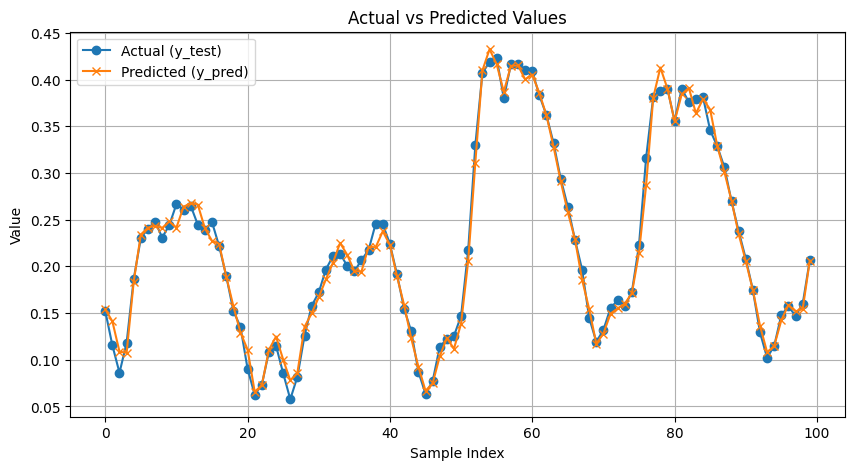

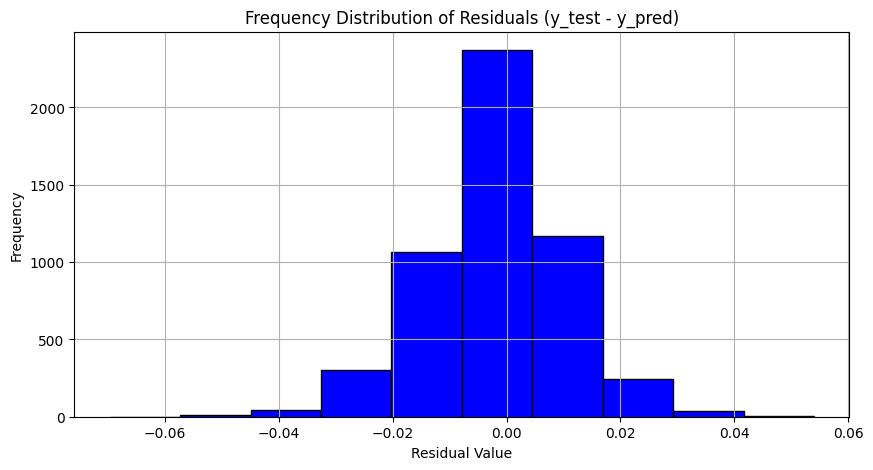

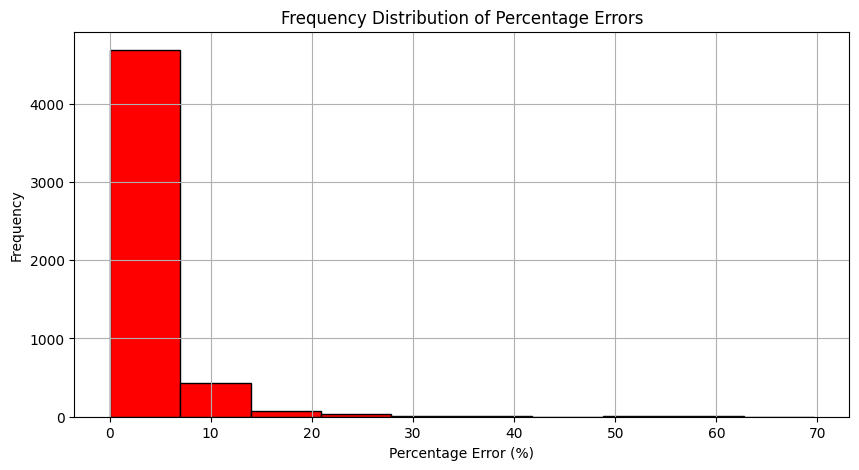

In [128]:
plot_regression_error_metrics(y_test, y_pred_lstm, bins=10, show = '100' )

In [129]:
#here we can see the results are much more better but these are after we have used the scalar

In [130]:
from tensorflow.keras.layers import GRU

In [131]:
model_gru = Sequential()
model_gru.add(GRU(64, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model_gru.add(Dropout(0.1))
model_gru.add(GRU(32))
model_gru.add(Dropout(0.1))
model_gru.add(Dense(1))
model_gru.compile(loss="mean_squared_error", optimizer="adam")

In [132]:
early_stop_gru = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history_gru = model_gru.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop_gru],
    verbose=1
)

Epoch 1/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0181 - val_loss: 0.0012
Epoch 2/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0031 - val_loss: 7.4586e-04
Epoch 3/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0022 - val_loss: 7.6210e-04
Epoch 4/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0017 - val_loss: 5.7585e-04
Epoch 5/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0014 - val_loss: 4.6183e-04
Epoch 6/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012 - val_loss: 4.2457e-04
Epoch 7/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0010 - val_loss: 4.3676e-04
Epoch 8/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.6560e-04 - val_loss: 9.4556e-04
Epoch 9/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.1933e-04 - val_loss: 4.3164e-04
Epoch 10/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 8.0125e-04 - val_loss: 3.6192e-04
Epoch 11/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.9972e-04 - val_lo

In [133]:
y_pred_gru = model_gru.predict(X_test)

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [134]:
def inverse_transform_target(scaled_values, scaler, target_index, n_features):
    dummy = np.zeros((len(scaled_values), n_features))
    dummy[:, target_index] = scaled_values.flatten()
    inv = scaler.inverse_transform(dummy)
    return inv[:, target_index]

In [135]:
n_features = scaled_data.shape[1]
y_pred_lstm_inv = inverse_transform_target(y_pred_lstm, scaler, target_index, n_features)
y_pred_gru_inv  = inverse_transform_target(y_pred_gru, scaler, target_index, n_features)
y_test_inv      = inverse_transform_target(y_test.reshape(-1, 1), scaler, target_index, n_features)

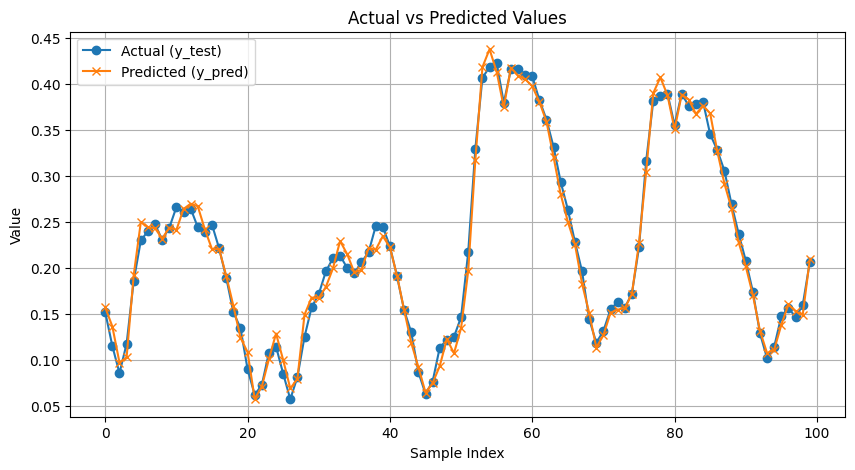

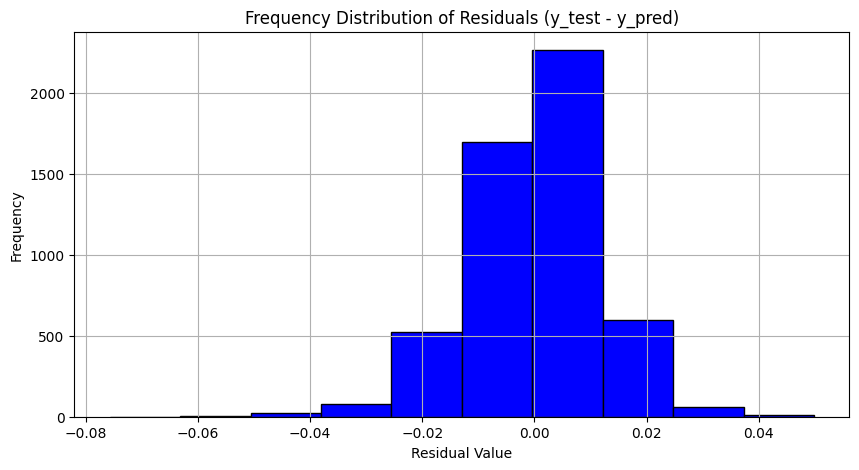

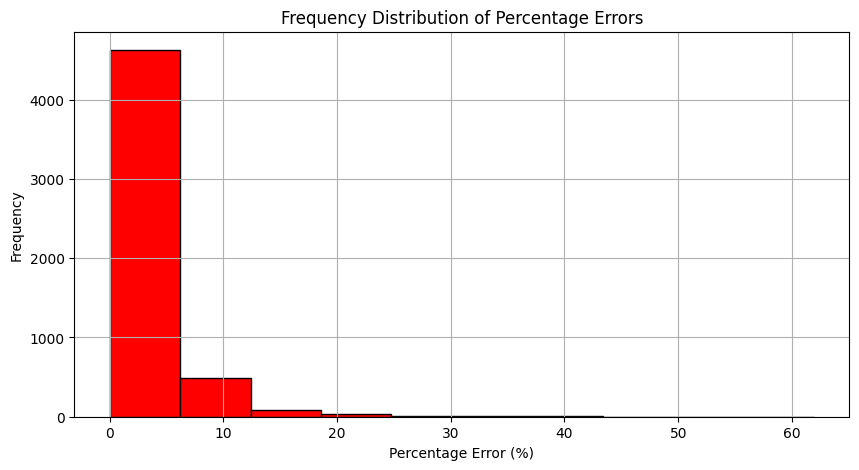

In [136]:
plot_regression_error_metrics(y_test, y_pred_gru, bins=10, show = '100' )

In [137]:
lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_lstm_inv))
gru_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_gru_inv))
print("LSTM RMSE:", lstm_rmse)
print("GRU RMSE:", gru_rmse)

LSTM RMSE: 22.980983023957496
GRU RMSE: 21.612708970935465


In [138]:
# Let's check the performance after scaling it back

In [139]:
def plot_regression_error_metrics_scaled(y_test, y_pred, bins=10, show : str = 'all', scaler = scaler):
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    residuals = y_test - y_pred
    percentage_error = np.abs(residuals) / (np.abs(y_test) + 1e-6) * 100

    # Plot 1: Actual vs Predicted
    if show == 'all':
      plt.figure(figsize=(10, 5))
      plt.plot(y_test, label='Actual (y_test)', marker='o')
      plt.plot(y_pred, label='Predicted (y_pred)', marker='x')
      plt.title("Actual vs Predicted Values")
      plt.xlabel("Sample Index")
      plt.ylabel("Value")
      plt.legend()
      plt.grid(True)
      plt.show()
    else:
      show = int(show)
      plt.figure(figsize=(10, 5))
      plt.plot(y_test[:show], label='Actual (y_test)', marker='o')
      plt.plot(y_pred[:show], label='Predicted (y_pred)', marker='x')
      plt.title("Actual vs Predicted Values")
      plt.xlabel("Sample Index")
      plt.ylabel("Value")
      plt.legend()
      plt.grid(True)
      plt.show()



    # Plot 2: Histogram of Residuals
    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=bins, edgecolor='black', color='blue')
    plt.title("Frequency Distribution of Residuals (y_test - y_pred)")
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Plot 3: Histogram of Percentage Errors
    plt.figure(figsize=(10, 5))
    plt.hist(percentage_error, bins=bins, edgecolor='black', color='red')
    plt.title("Frequency Distribution of Percentage Errors")
    plt.xlabel("Percentage Error (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

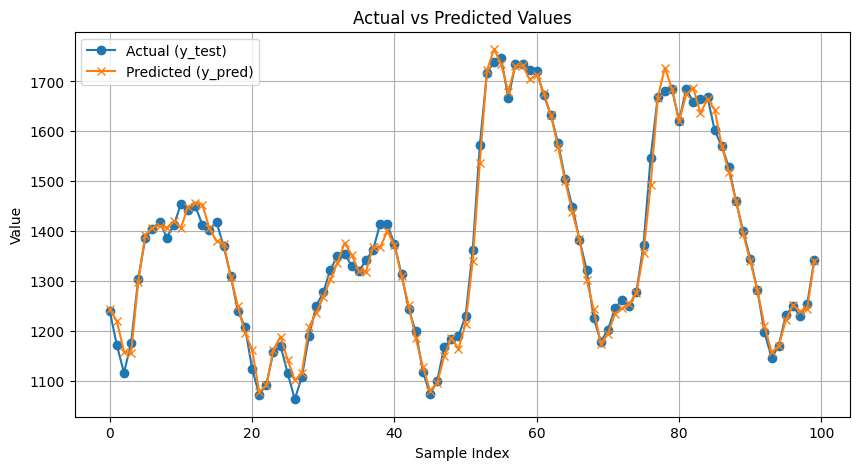

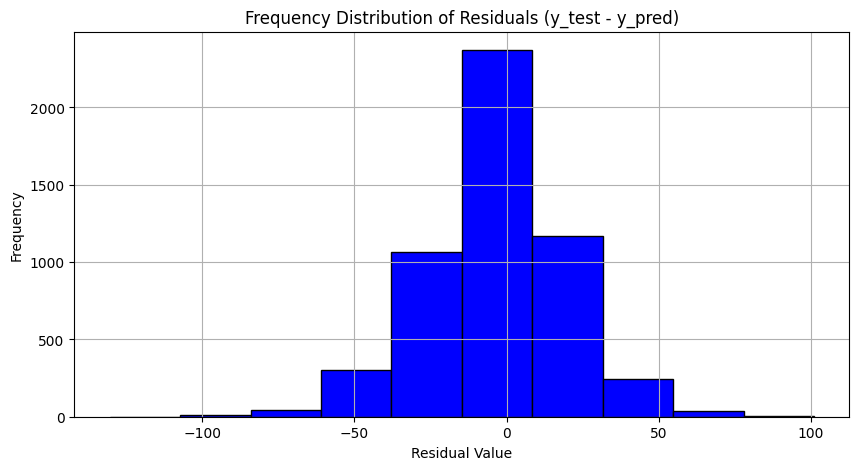

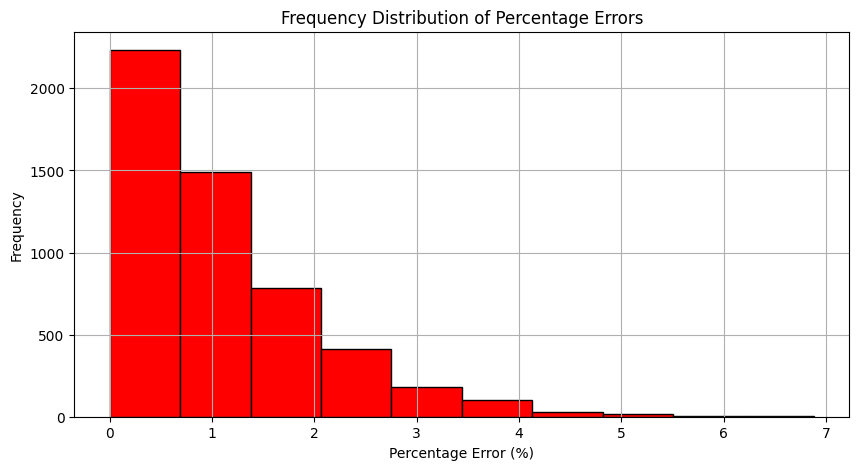

In [140]:
#for LSTM
plot_regression_error_metrics_scaled(y_test, y_pred_lstm, bins=10, show = '100', scaler = target_scaler)

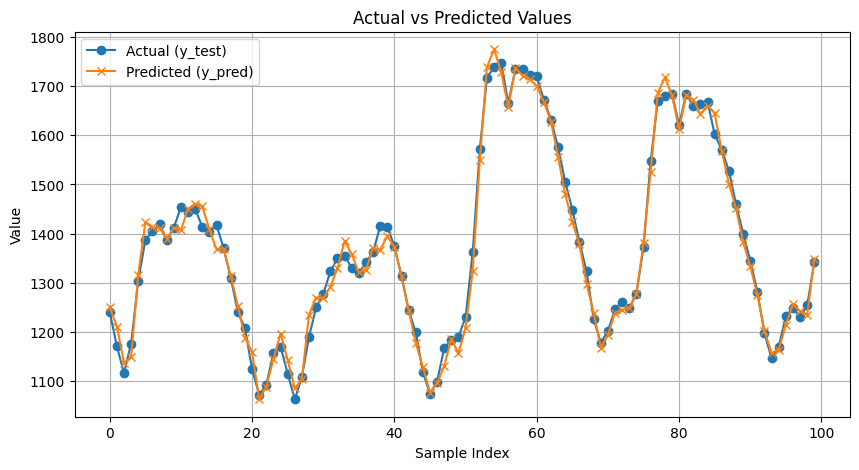

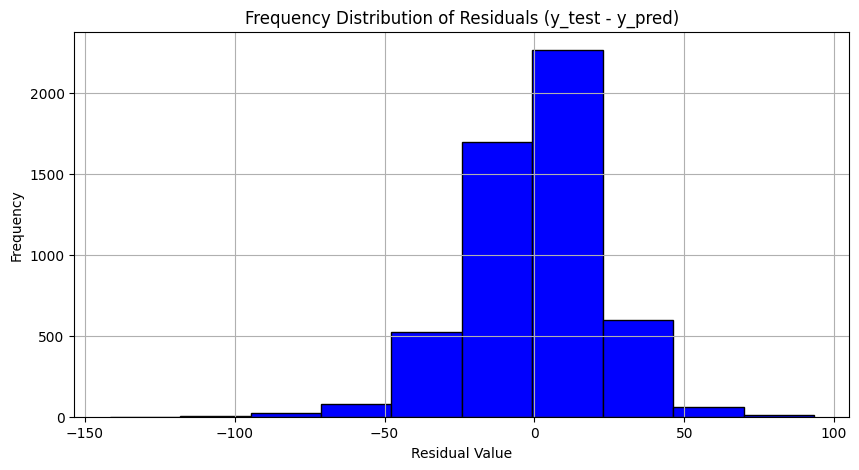

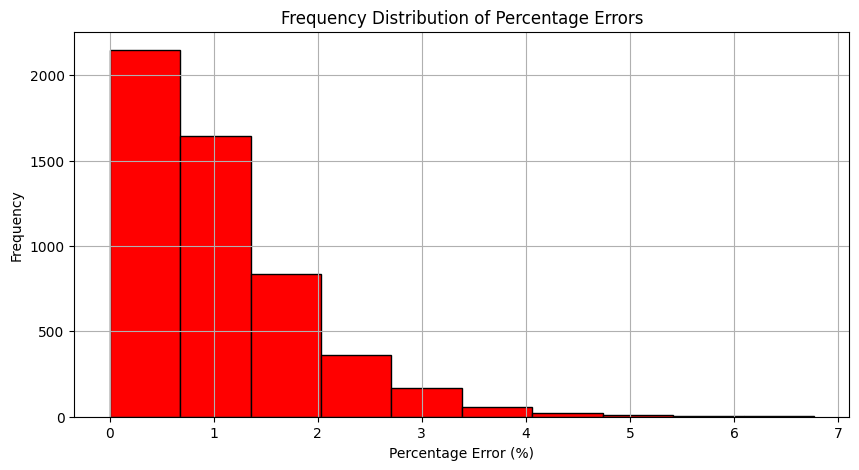

In [141]:
#for GRU
plot_regression_error_metrics_scaled(y_test, y_pred_gru, bins=10, show = '100', scaler = target_scaler)

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [143]:
def evaluate_model_performance(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")

In [144]:
evaluate_model_performance(y_test, y_pred_lstm)

Mean Absolute Error (MAE): 0.0092
Mean Squared Error (MSE): 0.0002
Root Mean Squared Error (RMSE): 0.0123
R-squared (R²): 0.9956


In [145]:
evaluate_model_performance(y_test, y_pred_gru)

Mean Absolute Error (MAE): 0.0089
Mean Squared Error (MSE): 0.0001
Root Mean Squared Error (RMSE): 0.0115
R-squared (R²): 0.9961


In [146]:
df_reduced

actual_performance(10000 kW)  kyoto_temperature  \
datetime                                                               
2021-01-01 00:00:00                          1571                0.6   
2021-01-01 01:00:00                          1492                0.5   
2021-01-01 02:00:00                          1453                0.2   
2021-01-01 03:00:00                          1412                0.0   
2021-01-01 04:00:00                          1358                0.0   
...                                           ...                ...   
2023-12-31 19:00:00                          1427               10.4   
2023-12-31 20:00:00                          1392                9.4   
2023-12-31 21:00:00                          1348                8.6   
2023-12-31 22:00:00                          1288                8.1   
2023-12-31 23:00:00                          1258                9.1   

                     kyoto_dew_point_temperature  kyoto_humidity  \
datetime                                                           
2021-01-01 00:00:00                         -5.0            66.0   
2021-01-01 01:00:00                         -4.9            67.0   
2021-01-01 02:00:00                         -5.0            68.0   
2021-01-01 03:00:00                         -4.6            71.0   
2021-01-01 04:00:00                         -4.6            71.0   
...                                          ...             ...   
2023-12-31 19:00:00                          5.6            72.0   
2023-12-31 20:00:00                          4.6            72.0   
2023-12-31 21:00:00                          5.5            81.0   
2023-12-31 22:00:00                          6.2            88.0   
2023-12-31 23:00:00                          5.7            79.0   

                     kyoto_wind_speed  wakayama_temperature  \
datetime                                                      
2021-01-01 00:00:00               2.1                   2.3   
2021-01-01 01:00:00               1.5                   3.1   
2021-01-01 02:00:00               0.9                   3.9   
2021-01-01 03:00:00               1.8                   3.9   
2021-01-01 04:00:00               2.3                   3.9   
...                               ...                   ...   
2023-12-31 19:00:00               2.0                  11.3   
2023-12-31 20:00:00               2.6                  11.0   
2023-12-31 21:00:00               3.0                  10.8   
2023-12-31 22:00:00               1.7                  10.2   
2023-12-31 23:00:00               1.6                  10.2   

                     wakayama_dew_point_temperature  wakayama_humidity  \
datetime                                                                 
2021-01-01 00:00:00                            -1.0               79.0   
2021-01-01 01:00:00                            -2.2               68.0   
2021-01-01 02:00:00                            -4.1               56.0   
2021-01-01 03:00:00                            -3.4               59.0   
2021-01-01 04:00:00                            -3.1               60.0   
...                                             ...                ...   
2023-12-31 19:00:00                             4.3               62.0   
2023-12-31 20:00:00                             4.5               64.0   
2023-12-31 21:00:00                             5.2               68.0   
2023-12-31 22:00:00                             5.0               70.0   
2023-12-31 23:00:00                             5.6               73.0   

                     wakayama_wind_speed  toyooka_temperature  ...  \
datetime                                                       ...   
2021-01-01 00:00:00                  2.6                 -0.3  ...   
2021-01-01 01:00:00                  1.5                 -0.2  ...   
2021-01-01 02:00:00                  6.2                  0.4  ...   
2021-01-01 03:00:00                  5.6                  0.1  ...

Let's also try out some time series models now

In [147]:
!pip install prophet

In [148]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [149]:
prophet_df = df_reduced.reset_index()[['datetime', 'actual_performance(10000 kW)']]
prophet_df.rename(columns={'datetime': 'ds', 'actual_performance(10000 kW)': 'y'}, inplace=True)

In [150]:
train_size = int(len(prophet_df) * 0.8)
train = prophet_df.iloc[:train_size].copy()
test = prophet_df.iloc[train_size:].copy()

In [151]:
model = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=10)
model.fit(train)

01:39:30 - cmdstanpy - INFO - Chain [1] start processing
01:39:43 - cmdstanpy - INFO - Chain [1] done processing


In [152]:
future = model.make_future_dataframe(periods=len(test),freq='h')

In [153]:
forecast = model.predict(future)

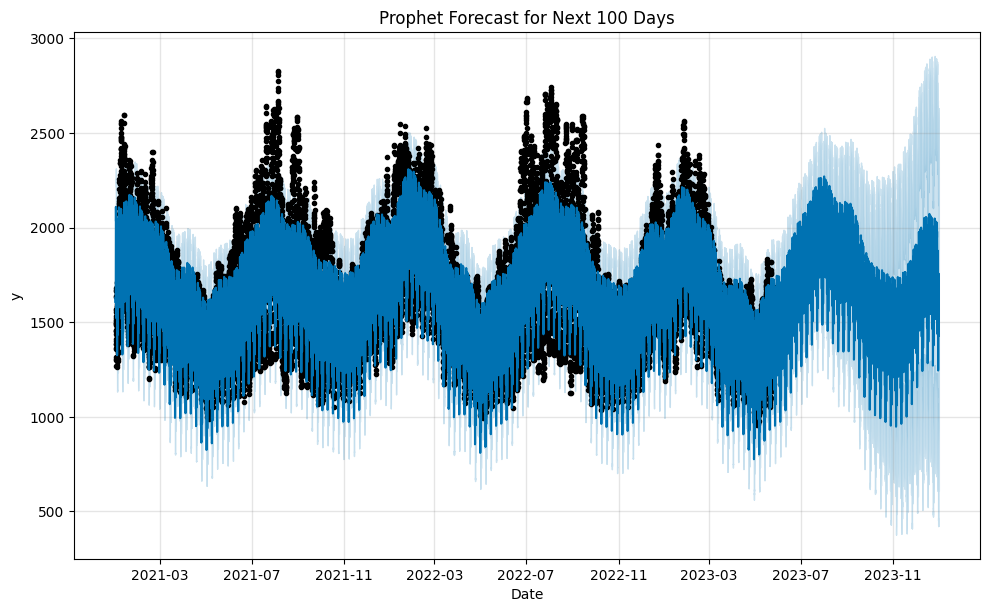

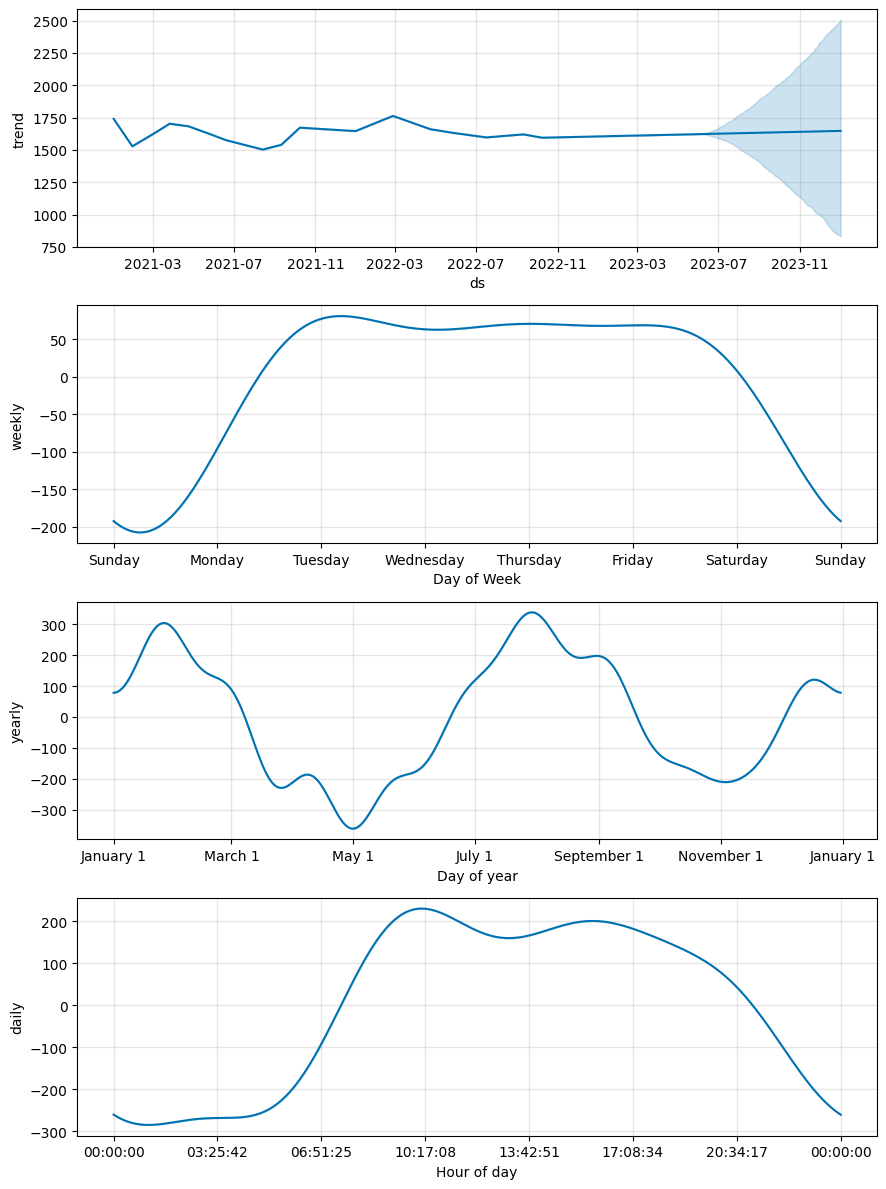

In [154]:
fig1 = model.plot(forecast)
plt.title("Prophet Forecast for Next 100 Days")
plt.xlabel("Date")
plt.ylabel("y")
plt.show()


fig2 = model.plot_components(forecast)
plt.show()

In [155]:
forecast_test = forecast[['ds', 'yhat']].merge(test, on='ds')

In [156]:
mse = mean_squared_error(forecast_test['y'], forecast_test['yhat'])
mae = mean_absolute_error(forecast_test['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)

print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test RMSE:", rmse)

Test MSE: 30623.156701319243
Test MAE: 138.5317451021824
Test RMSE: 174.9947333530905


In [157]:
from prophet.plot import plot_plotly

In [158]:
fig = plot_plotly(model, forecast)
fig.update_layout(
    title='Actual vs. Predicted Values',
    xaxis_title='Date',
    yaxis_title='10000 kW'
)
fig.show()

In [159]:
#As LSTM and GRU performed the best we will take those model and will try to find the best parameters for them

In [160]:
# now lets also check if we should be adding a column for the is_holiday and if it will be helpful for our predictions

In [161]:
#this is the best model we had when we had not added the is_holiday column
"""XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None"""

'XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=1.0, device=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=0.1, max_bin=None,\n             max_cat_threshold=None, max_cat_to_onehot=None,\n             max_delta_step=None, max_depth=7, max_leaves=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             multi_strategy=None, n_estimators=200, n_jobs=None,\n             num_parallel_tree=None, random_state=None'

In [55]:
!pip install jpholiday

In [56]:
import jpholiday

In [164]:
df_reduced

actual_performance(10000 kW)  kyoto_temperature  \
datetime                                                               
2021-01-01 00:00:00                          1571                0.6   
2021-01-01 01:00:00                          1492                0.5   
2021-01-01 02:00:00                          1453                0.2   
2021-01-01 03:00:00                          1412                0.0   
2021-01-01 04:00:00                          1358                0.0   
...                                           ...                ...   
2023-12-31 19:00:00                          1427               10.4   
2023-12-31 20:00:00                          1392                9.4   
2023-12-31 21:00:00                          1348                8.6   
2023-12-31 22:00:00                          1288                8.1   
2023-12-31 23:00:00                          1258                9.1   

                     kyoto_dew_point_temperature  kyoto_humidity  \
datetime                                                           
2021-01-01 00:00:00                         -5.0            66.0   
2021-01-01 01:00:00                         -4.9            67.0   
2021-01-01 02:00:00                         -5.0            68.0   
2021-01-01 03:00:00                         -4.6            71.0   
2021-01-01 04:00:00                         -4.6            71.0   
...                                          ...             ...   
2023-12-31 19:00:00                          5.6            72.0   
2023-12-31 20:00:00                          4.6            72.0   
2023-12-31 21:00:00                          5.5            81.0   
2023-12-31 22:00:00                          6.2            88.0   
2023-12-31 23:00:00                          5.7            79.0   

                     kyoto_wind_speed  wakayama_temperature  \
datetime                                                      
2021-01-01 00:00:00               2.1                   2.3   
2021-01-01 01:00:00               1.5                   3.1   
2021-01-01 02:00:00               0.9                   3.9   
2021-01-01 03:00:00               1.8                   3.9   
2021-01-01 04:00:00               2.3                   3.9   
...                               ...                   ...   
2023-12-31 19:00:00               2.0                  11.3   
2023-12-31 20:00:00               2.6                  11.0   
2023-12-31 21:00:00               3.0                  10.8   
2023-12-31 22:00:00               1.7                  10.2   
2023-12-31 23:00:00               1.6                  10.2   

                     wakayama_dew_point_temperature  wakayama_humidity  \
datetime                                                                 
2021-01-01 00:00:00                            -1.0               79.0   
2021-01-01 01:00:00                            -2.2               68.0   
2021-01-01 02:00:00                            -4.1               56.0   
2021-01-01 03:00:00                            -3.4               59.0   
2021-01-01 04:00:00                            -3.1               60.0   
...                                             ...                ...   
2023-12-31 19:00:00                             4.3               62.0   
2023-12-31 20:00:00                             4.5               64.0   
2023-12-31 21:00:00                             5.2               68.0   
2023-12-31 22:00:00                             5.0               70.0   
2023-12-31 23:00:00                             5.6               73.0   

                     wakayama_wind_speed  toyooka_temperature  ...  \
datetime                                                       ...   
2021-01-01 00:00:00                  2.6                 -0.3  ...   
2021-01-01 01:00:00                  1.5                 -0.2  ...   
2021-01-01 02:00:00                  6.2                  0.4  ...   
2021-01-01 03:00:00                  5.6                  0.1  ...

In [57]:
df_reduced['is_holiday'] = df_reduced.index.to_series().apply(lambda x: bool(jpholiday.is_holiday(x)))

In [58]:
df_reduced['is_holiday']

datetime
2021-01-01 00:00:00     True
2021-01-01 01:00:00     True
2021-01-01 02:00:00     True
2021-01-01 03:00:00     True
2021-01-01 04:00:00     True
                       ...  
2023-12-31 19:00:00    False
2023-12-31 20:00:00    False
2023-12-31 21:00:00    False
2023-12-31 22:00:00    False
2023-12-31 23:00:00    False
Name: is_holiday, Length: 26280, dtype: bool

In [59]:
df_reduced['is_holiday'] = df_reduced['is_holiday'].astype(int)

In [168]:
df_reduced['is_holiday']

datetime
2021-01-01 00:00:00    1
2021-01-01 01:00:00    1
2021-01-01 02:00:00    1
2021-01-01 03:00:00    1
2021-01-01 04:00:00    1
                      ..
2023-12-31 19:00:00    0
2023-12-31 20:00:00    0
2023-12-31 21:00:00    0
2023-12-31 22:00:00    0
2023-12-31 23:00:00    0
Name: is_holiday, Length: 26280, dtype: int64

In [169]:
corr_matrix = df_reduced.corr()

In [170]:
cols = corr_matrix.columns.tolist()
if 'actual_performance(10000 kW)' in cols:
    cols = ['actual_performance(10000 kW)'] + [col for col in cols if col != 'actual_performance(10000 kW)']
    corr_matrix = corr_matrix.loc[cols, cols]

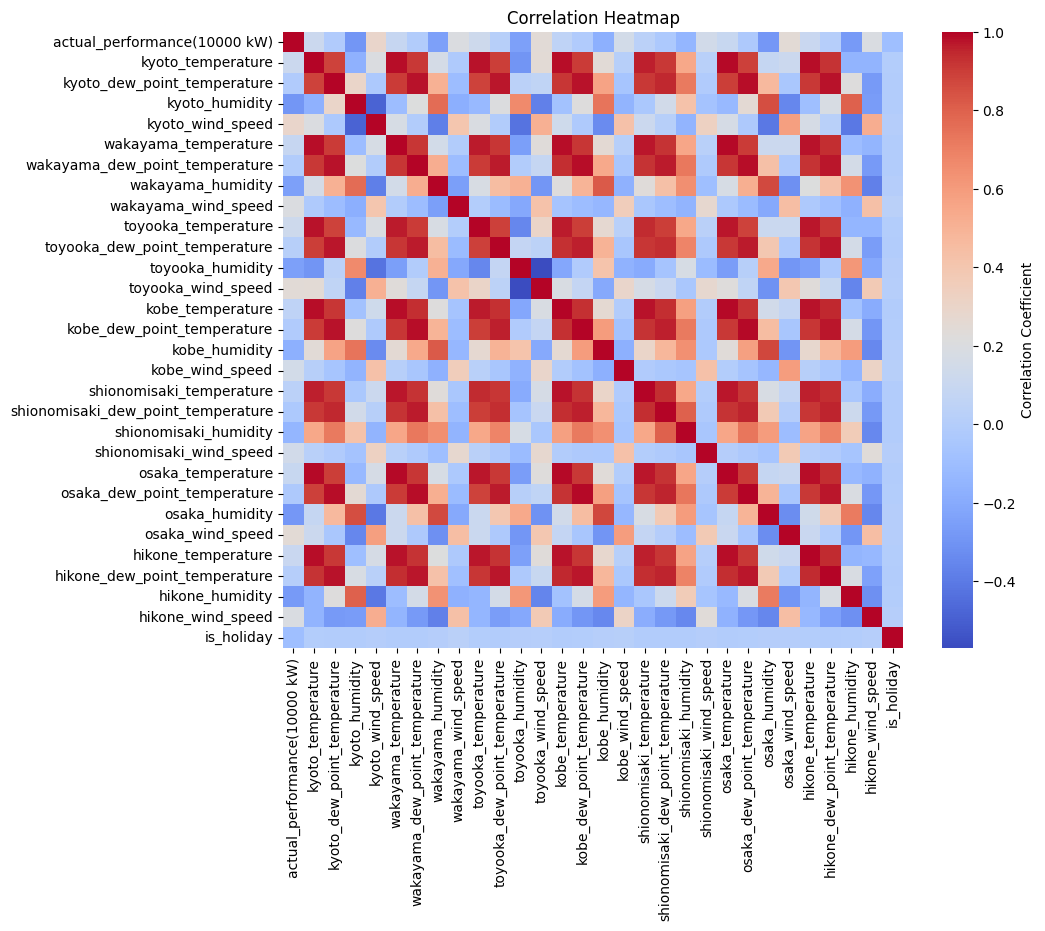

In [171]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap')
plt.show()

In [172]:
# as we can see above there is some realtion between is_holiday and the target column

In [62]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [61]:
target_col = 'actual_performance(10000 kW)'

In [63]:
X = df_reduced.drop(columns=[target_col])
y = df_reduced[target_col]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
final_model = XGBRegressor(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    random_state=42,
    )

In [178]:
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [179]:
y_pred = final_model.predict(X_test)

In [180]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Test RMSE: 175.1107357850706


In [181]:
# RMSE value has indeed decreased lets see how it will perform in LSTM and Gru's

In [67]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_reduced)
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit_transform(df_reduced[['actual_performance(10000 kW)']])

array([[0.32905983],
       [0.28685897],
       [0.26602564],
       ...,
       [0.2099359 ],
       [0.17788462],
       [0.16185897]])

In [184]:
target_index = df_reduced.columns.get_loc("actual_performance(10000 kW)")

In [69]:
def create_dataset_multivariate(dataset, look_back, target_index):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i : i + look_back, :])
        y.append(dataset[i + look_back, target_index])
    return np.array(X), np.array(y)

In [186]:
look_back = 24
X, y = create_dataset_multivariate(scaled_data, look_back, target_index)

In [187]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [188]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(loss="mean_squared_error", optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [189]:
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [190]:
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0194 - val_loss: 0.0023
Epoch 2/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0053 - val_loss: 0.0015
Epoch 3/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 4/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 5/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0020 - val_loss: 7.1948e-04
Epoch 6/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0017 - val_loss: 6.7818e-04
Epoch 7/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0014 - val_loss: 6.0079e-04
Epoch 8/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0012 - val_loss: 4.5201e-04
Epoch 9/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0012 - val_loss: 5.8600e-04
Epoch 10/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0011 - val_loss: 3.7664e-04
Epoch 11/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.9545e-04 - val_loss: 4.5224e-04
Epoch 12/

In [191]:
y_pred_lstm = model_lstm.predict(X_test)

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [192]:
def plot_regression_error_metrics(y_test, y_pred, bins=10, show : str = 'all'):
    y_test = np.array(y_test).flatten()
    y_pred = np.array(y_pred).flatten()

    residuals = y_test - y_pred
    percentage_error = np.abs(residuals) / (np.abs(y_test) + 1e-6) * 100

    # Plot 1: Actual vs Predicted
    if show == 'all':
      plt.figure(figsize=(10, 5))
      plt.plot(y_test, label='Actual (y_test)', marker='o')
      plt.plot(y_pred, label='Predicted (y_pred)', marker='x')
      plt.title("Actual vs Predicted Values")
      plt.xlabel("Sample Index")
      plt.ylabel("Value")
      plt.legend()
      plt.grid(True)
      plt.show()
    else:
      show = int(show)
      plt.figure(figsize=(10, 5))
      plt.plot(y_test[:show], label='Actual (y_test)', marker='o')
      plt.plot(y_pred[:show], label='Predicted (y_pred)', marker='x')
      plt.title("Actual vs Predicted Values")
      plt.xlabel("Sample Index")
      plt.ylabel("Value")
      plt.legend()
      plt.grid(True)
      plt.show()



    # Plot 2: Histogram of Residuals
    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=bins, edgecolor='black', color='blue')
    plt.title("Frequency Distribution of Residuals (y_test - y_pred)")
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Plot 3: Histogram of Percentage Errors
    plt.figure(figsize=(10, 5))
    plt.hist(percentage_error, bins=bins, edgecolor='black', color='red')
    plt.title("Frequency Distribution of Percentage Errors")
    plt.xlabel("Percentage Error (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

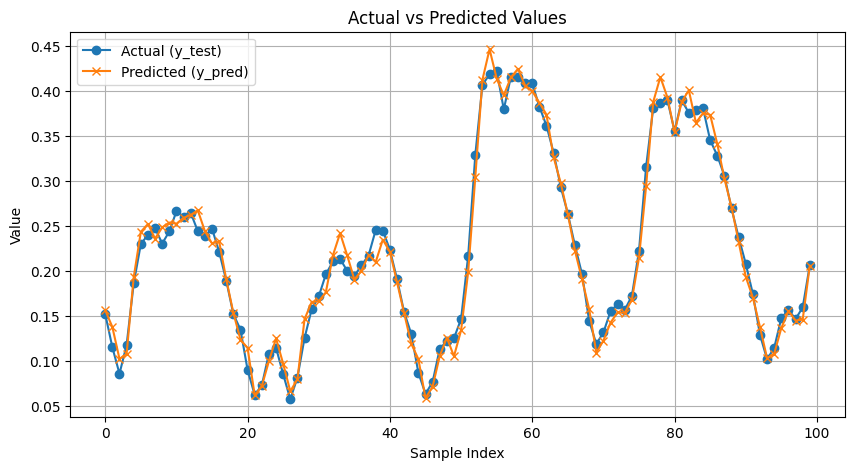

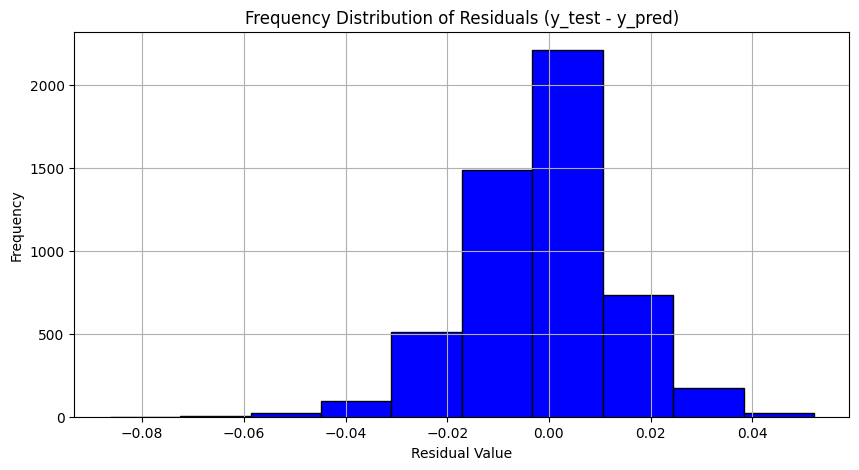

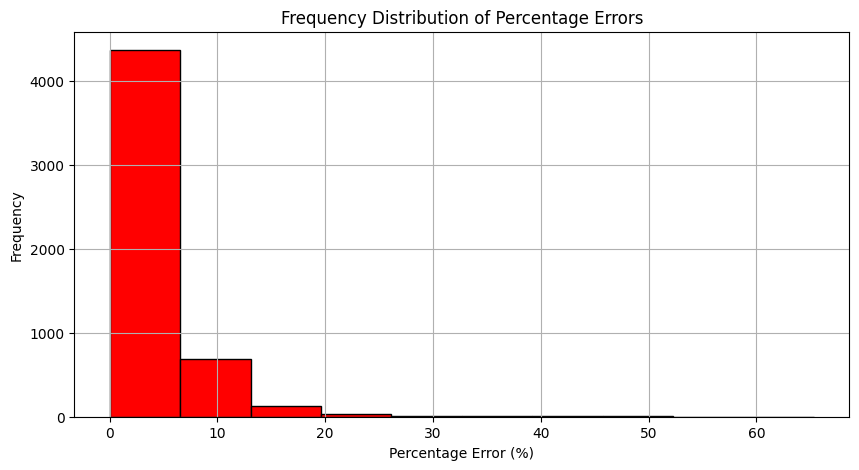

In [193]:
plot_regression_error_metrics(y_test, y_pred_lstm, bins=10, show = '100' )

In [194]:
from tensorflow.keras.layers import GRU

In [195]:
model_gru = Sequential()
model_gru.add(GRU(64, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model_gru.add(Dropout(0.1))
model_gru.add(GRU(32))
model_gru.add(Dropout(0.1))
model_gru.add(Dense(1))
model_gru.compile(loss="mean_squared_error", optimizer="adam")

In [196]:
early_stop_gru = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history_gru = model_gru.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop_gru],
    verbose=1
)

Epoch 1/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0232 - val_loss: 0.0012
Epoch 2/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0032 - val_loss: 7.9717e-04
Epoch 3/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0023 - val_loss: 7.7188e-04
Epoch 4/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0017 - val_loss: 5.9219e-04
Epoch 5/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0015 - val_loss: 5.2281e-04
Epoch 6/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0012 - val_loss: 5.4974e-04
Epoch 7/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0011 - val_loss: 4.7185e-04
Epoch 8/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.7219e-04 - val_loss: 4.0974e-04
Epoch 9/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 8.4411e-04 - val_loss: 3.4952e-04
Epoch 10/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.7630e-04 - val_loss: 3.1897e-04
Epoch 11/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.9959e-04 - val_lo

In [197]:
y_pred_gru = model_gru.predict(X_test)

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


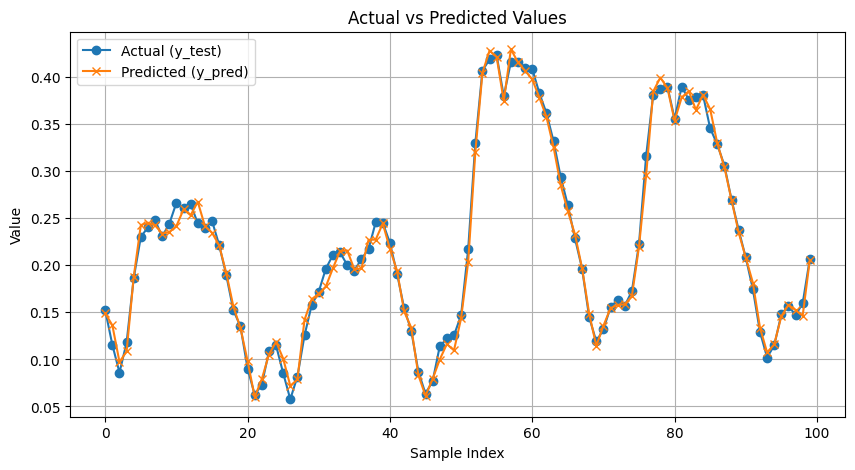

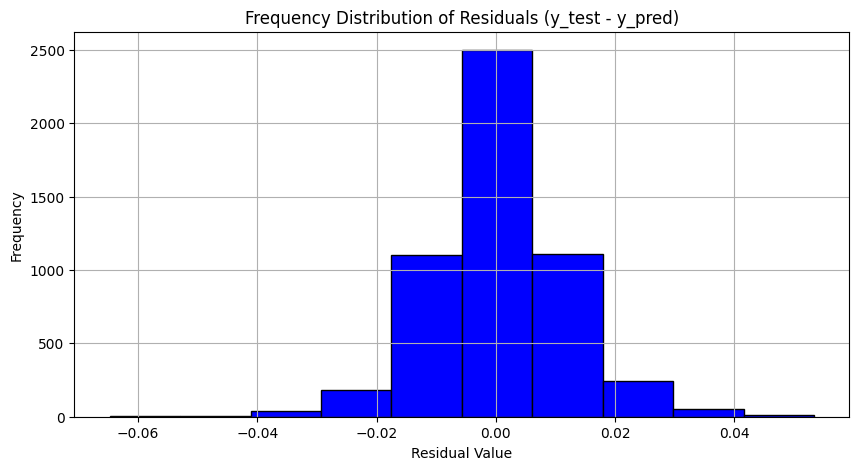

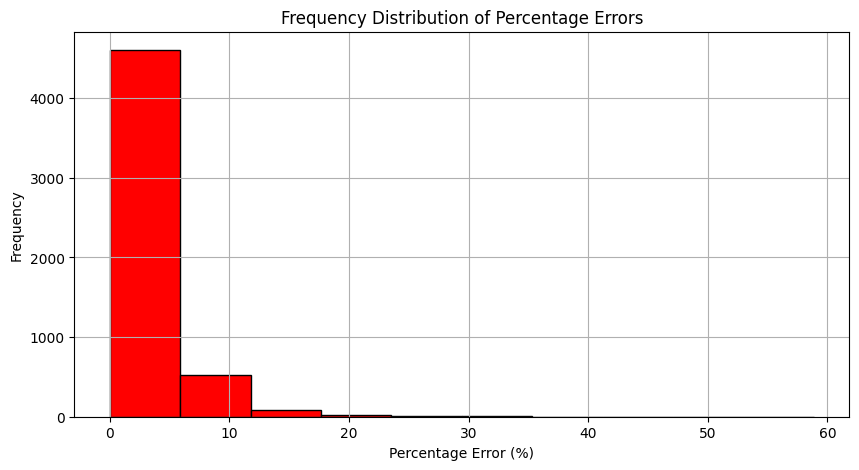

In [198]:
plot_regression_error_metrics(y_test, y_pred_gru, bins=10, show = '100' )

In [65]:
def inverse_transform_target(scaled_values, scaler, target_index, n_features):
    dummy = np.zeros((len(scaled_values), n_features))
    dummy[:, target_index] = scaled_values.flatten()
    inv = scaler.inverse_transform(dummy)
    return inv[:, target_index]

In [200]:
n_features = scaled_data.shape[1]
y_pred_lstm_inv = inverse_transform_target(y_pred_lstm, scaler, target_index, n_features)
y_pred_gru_inv  = inverse_transform_target(y_pred_gru, scaler, target_index, n_features)
y_test_inv      = inverse_transform_target(y_test.reshape(-1, 1), scaler, target_index, n_features)

In [201]:
lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_lstm_inv))
gru_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_gru_inv))
print("LSTM RMSE:", lstm_rmse)
print("GRU RMSE:", gru_rmse)

LSTM RMSE: 26.49433467098286
GRU RMSE: 20.642745497790948


In [70]:
def plot_regression_error_metrics_scaled(y_test, y_pred, bins=10, show : str = 'all', scaler = scaler):
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    residuals = y_test - y_pred
    percentage_error = np.abs(residuals) / (np.abs(y_test) + 1e-6) * 100

    # Plot 1: Actual vs Predicted
    if show == 'all':
      plt.figure(figsize=(10, 5))
      plt.plot(y_test, label='Actual (y_test)', marker='o')
      plt.plot(y_pred, label='Predicted (y_pred)', marker='x')
      plt.title("Actual vs Predicted Values")
      plt.xlabel("Sample Index")
      plt.ylabel("Value")
      plt.legend()
      plt.grid(True)
      plt.show()
    else:
      show = int(show)
      plt.figure(figsize=(10, 5))
      plt.plot(y_test[:show], label='Actual (y_test)', marker='o')
      plt.plot(y_pred[:show], label='Predicted (y_pred)', marker='x')
      plt.title("Actual vs Predicted Values")
      plt.xlabel("Sample Index")
      plt.ylabel("Value")
      plt.legend()
      plt.grid(True)
      plt.show()



    # Plot 2: Histogram of Residuals
    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=bins, edgecolor='black', color='blue')
    plt.title("Frequency Distribution of Residuals (y_test - y_pred)")
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Plot 3: Histogram of Percentage Errors
    plt.figure(figsize=(10, 5))
    plt.hist(percentage_error, bins=bins, edgecolor='black', color='red')
    plt.title("Frequency Distribution of Percentage Errors")
    plt.xlabel("Percentage Error (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

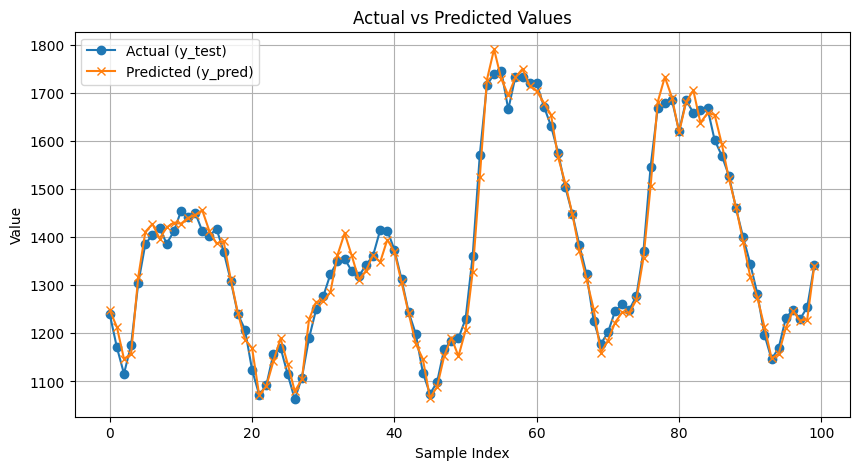

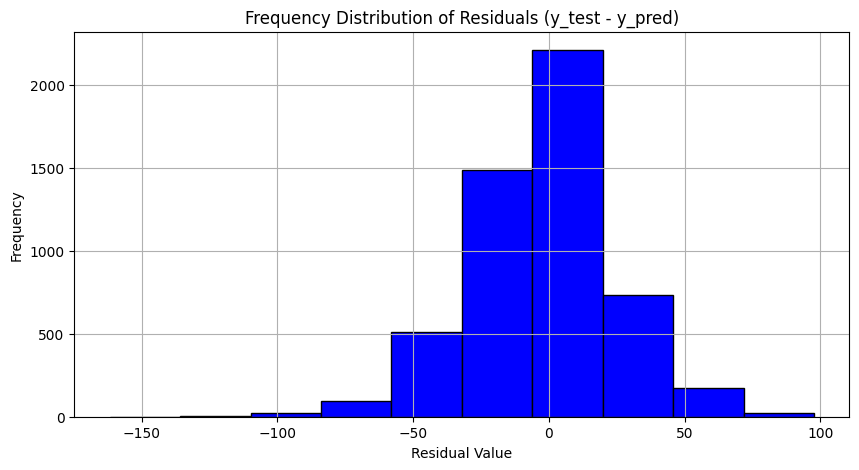

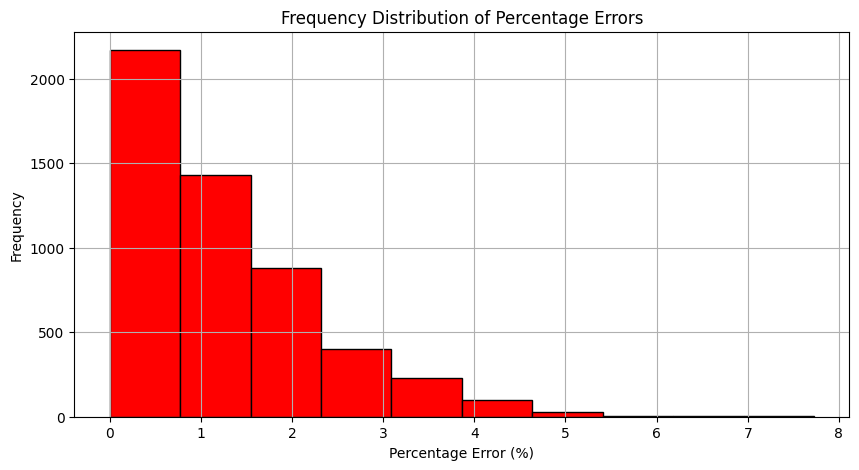

In [203]:
#for LSTM
plot_regression_error_metrics_scaled(y_test, y_pred_lstm, bins=10, show = '100', scaler = target_scaler)

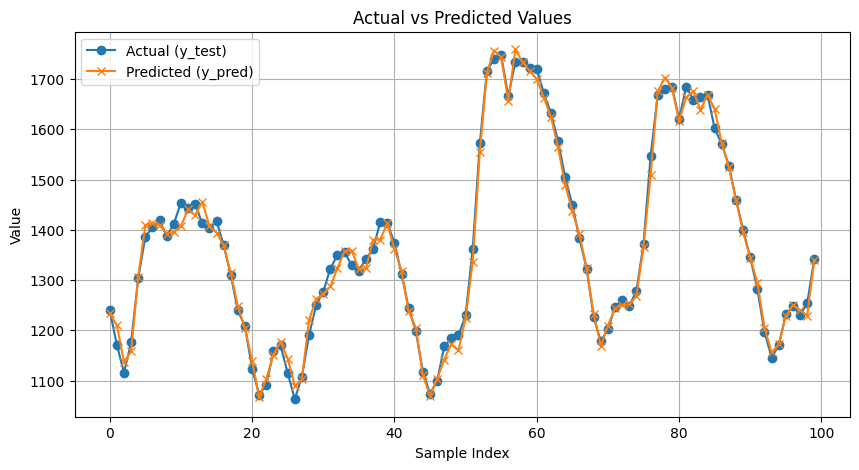

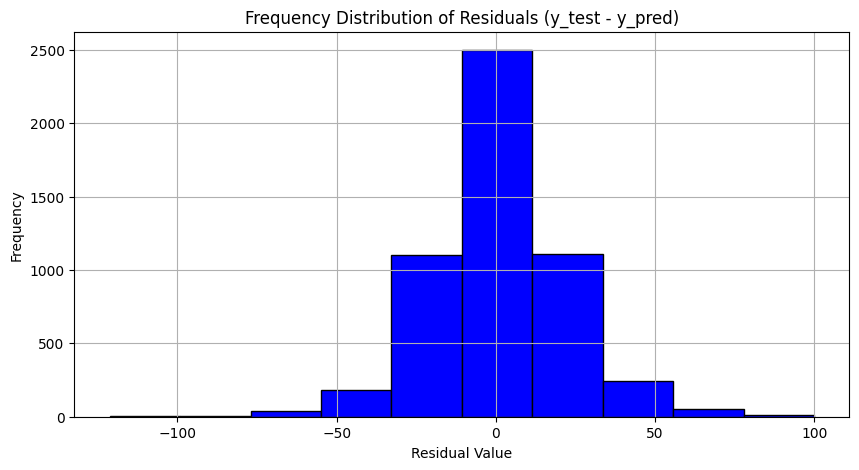

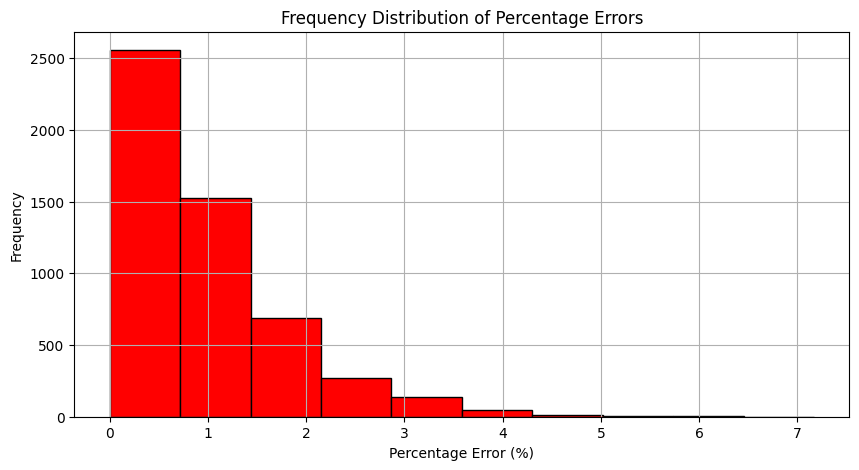

In [204]:
#for GRU
plot_regression_error_metrics_scaled(y_test, y_pred_gru, bins=10, show = '100', scaler = target_scaler)

In [205]:
# we were able to reduce the error in it and currently GRU is performing better than the Lstm model lets see if we can increase the accuracy even more

In [206]:
# lets drop some more features that might be affecting the outcomes

In [71]:
corr_matrix = df_reduced.corr().abs()

In [72]:
target_corr = df_reduced.corr()[target_col].abs().sort_values(ascending=False)

In [209]:
print(target_corr)

actual_performance(10000 kW)          1.000000
kyoto_wind_speed                      0.289850
kyoto_humidity                        0.289311
osaka_humidity                        0.283363
hikone_humidity                       0.270972
toyooka_humidity                      0.249908
wakayama_humidity                     0.247713
osaka_wind_speed                      0.246679
toyooka_wind_speed                    0.243234
wakayama_wind_speed                   0.197313
hikone_wind_speed                     0.192133
kobe_humidity                         0.174372
kobe_wind_speed                       0.152306
shionomisaki_wind_speed               0.147406
shionomisaki_humidity                 0.144676
toyooka_temperature                   0.125545
kyoto_temperature                     0.116592
hikone_temperature                    0.104273
osaka_temperature                     0.096157
is_holiday                            0.092627
wakayama_temperature                  0.091056
kobe_temperat

In [74]:
threshold = 0.1

In [75]:
selected_features = target_corr[target_corr >= threshold].index.tolist()

In [212]:
selected_features

['actual_performance(10000 kW)',
 'kyoto_wind_speed',
 'kyoto_humidity',
 'osaka_humidity',
 'hikone_humidity',
 'toyooka_humidity',
 'wakayama_humidity',
 'osaka_wind_speed',
 'toyooka_wind_speed',
 'wakayama_wind_speed',
 'hikone_wind_speed',
 'kobe_humidity',
 'kobe_wind_speed',
 'shionomisaki_wind_speed',
 'shionomisaki_humidity',
 'toyooka_temperature',
 'kyoto_temperature',
 'hikone_temperature']

In [213]:
# removing the dew_point columns because they have less relation to the target column

In [117]:
df_reduced = df_reduced.loc[:, ~df_reduced.columns.str.contains('dew_point_temperature')]

In [118]:
df_reduced

actual_performance(10000 kW)  kyoto_temperature  \
datetime                                                               
2021-01-01 00:00:00                          1571                0.6   
2021-01-01 01:00:00                          1492                0.5   
2021-01-01 02:00:00                          1453                0.2   
2021-01-01 03:00:00                          1412                0.0   
2021-01-01 04:00:00                          1358                0.0   
...                                           ...                ...   
2023-12-31 19:00:00                          1427               10.4   
2023-12-31 20:00:00                          1392                9.4   
2023-12-31 21:00:00                          1348                8.6   
2023-12-31 22:00:00                          1288                8.1   
2023-12-31 23:00:00                          1258                9.1   

                     kyoto_humidity  kyoto_wind_speed  wakayama_temperature  \
datetime                                                                      
2021-01-01 00:00:00            66.0               2.1                   2.3   
2021-01-01 01:00:00            67.0               1.5                   3.1   
2021-01-01 02:00:00            68.0               0.9                   3.9   
2021-01-01 03:00:00            71.0               1.8                   3.9   
2021-01-01 04:00:00            71.0               2.3                   3.9   
...                             ...               ...                   ...   
2023-12-31 19:00:00            72.0               2.0                  11.3   
2023-12-31 20:00:00            72.0               2.6                  11.0   
2023-12-31 21:00:00            81.0               3.0                  10.8   
2023-12-31 22:00:00            88.0               1.7                  10.2   
2023-12-31 23:00:00            79.0               1.6                  10.2   

                     wakayama_humidity  wakayama_wind_speed  \
datetime                                                      
2021-01-01 00:00:00               79.0                  2.6   
2021-01-01 01:00:00               68.0                  1.5   
2021-01-01 02:00:00               56.0                  6.2   
2021-01-01 03:00:00               59.0                  5.6   
2021-01-01 04:00:00               60.0                  5.8   
...                                ...                  ...   
2023-12-31 19:00:00               62.0                  7.6   
2023-12-31 20:00:00               64.0                  3.4   
2023-12-31 21:00:00               68.0                  7.8   
2023-12-31 22:00:00               70.0                  7.2   
2023-12-31 23:00:00               73.0                  5.3   

                     toyooka_temperature  toyooka_humidity  \
datetime                                                     
2021-01-01 00:00:00                 -0.3              99.0   
2021-01-01 01:00:00                 -0.2              99.0   
2021-01-01 02:00:00                  0.4              97.0   
2021-01-01 03:00:00                  0.1             100.0   
2021-01-01 04:00:00                  0.2             100.0   
...                                  ...               ...   
2023-12-31 19:00:00                  7.9              94.0   
2023-12-31 20:00:00                  9.9              80.0   
2023-12-31 21:00:00                  9.9              76.0   
2023-12-31 22:00:00                  9.2              79.0   
2023-12-31 23:00:00                  7.7              82.0   

                     toyooka_wind_speed  ...  shionomisaki_temperature  \
datetime                                 ...                             
2021-01-01 00:00:00                 2.1  ...                       3.7   
2021-01-01 01:00:00                 2.0  ...                       4.1   
2021-01-01 02:00:00                 3.5  ...                       4.0   
2021-01-01 03:00:00                 2.2  ...               

In [119]:
scaled_data = scaler.fit_transform(df_reduced)

In [120]:
X_seq, y_seq = create_dataset_multivariate(scaled_data, 24, target_index)

In [121]:
X_flat = X_seq[:, -1, :]
y_flat = y_seq

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_flat, y_flat, test_size=0.2, random_state=42)

In [219]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [220]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 7, 8],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [224]:
xgb_model = XGBRegressor(
    random_state=42,
    tree='hist',
    device = 'cuda',
    predictor='gpu_predictor',)

In [225]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [226]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[02:00:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "tree" } are not used.




GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor='gpu_predictor', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 6, 7, 8],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [227]:
print("Best parameters found:", grid_search.best_params_)
print("Best negative MSE:", grid_search.best_score_)

Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
Best negative MSE: -0.0013481209926070664


In [228]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Test RMSE: 0.036098846676460766


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[02:01:48] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.




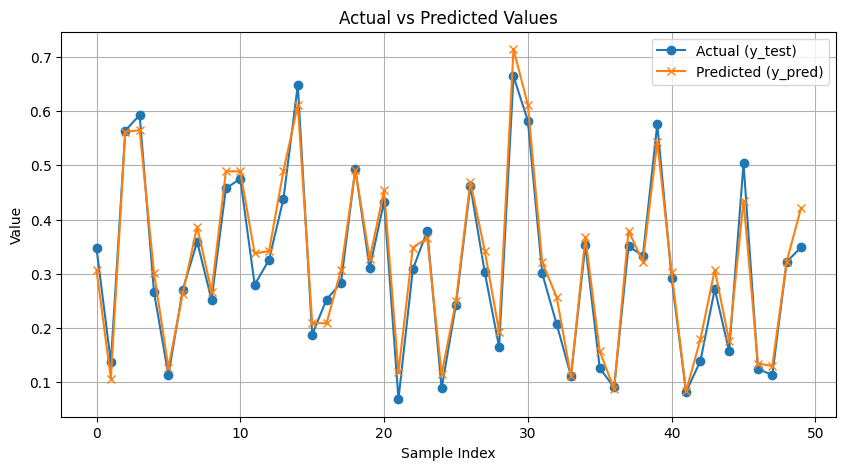

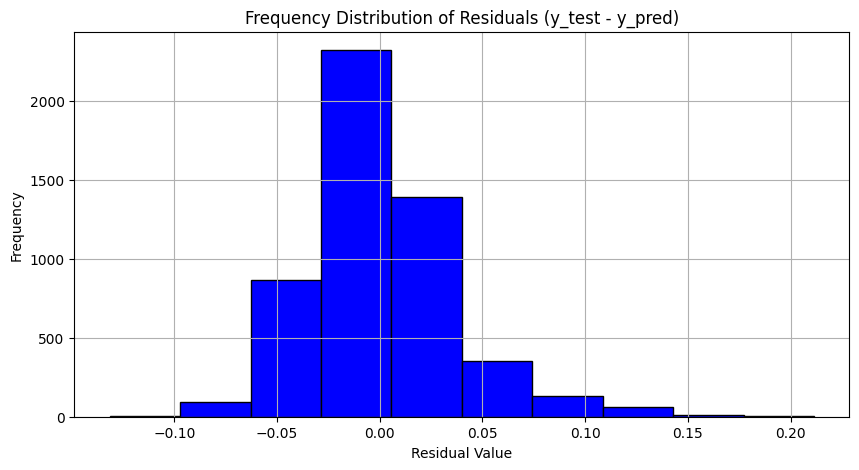

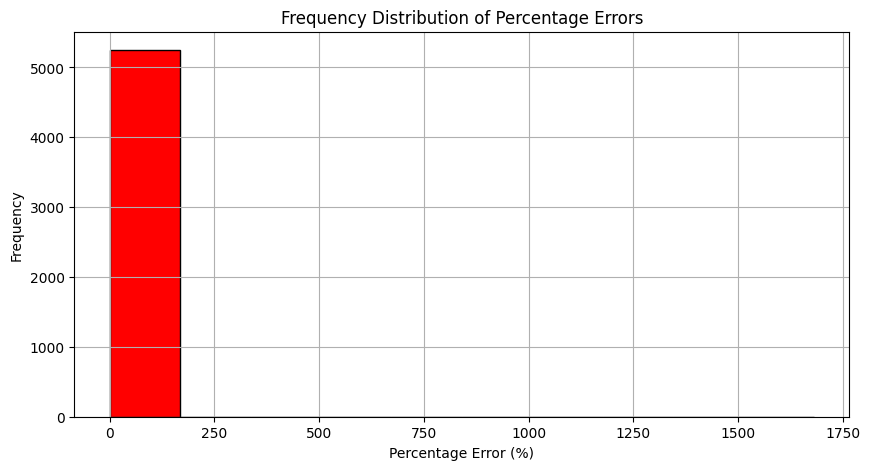

In [229]:
plot_regression_error_metrics(y_test, y_pred, bins=10, show = '50' )

In [77]:
!pip install keras-tuner


In [78]:
import keras_tuner as kt
import tensorflow as tf

In [123]:
X = df_reduced.drop(columns=['actual_performance(10000 kW)'])
y = df_reduced['actual_performance(10000 kW)']

In [137]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_reduced)
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit_transform(df_reduced[['actual_performance(10000 kW)']])

array([[0.32905983],
       [0.28685897],
       [0.26602564],
       ...,
       [0.2099359 ],
       [0.17788462],
       [0.16185897]])

In [138]:
X, y = create_dataset_multivariate(scaled_data, look_back, target_index)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
# lets first check out some lightweight models and then we will try to fit the data for more complex one's

In [246]:
def build_lstm_model_light(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=64, max_value=128, step=16),
                   input_shape=(X_seq.shape[1], X_seq.shape[2])))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4]),
        clipnorm=1.0zz
    )
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [257]:
tuner_lstm = kt.RandomSearch(build_lstm_model_light, objective='val_loss', max_trials=10, executions_per_trial=1, directory='dir', project_name='build_lstm_model_light')
tuner_lstm.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Reloading Tuner from dir/build_lstm_model_light/tuner0.json


In [258]:
best_lstm = tuner_lstm.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 



In [259]:
lstm_pred = best_lstm.predict(X_test)
lstm_rmse = np.sqrt(np.mean((lstm_pred.flatten() - y_test)**2))
print("Best LSTM RMSE:", lstm_rmse)

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best LSTM RMSE: 0.019302141567328193


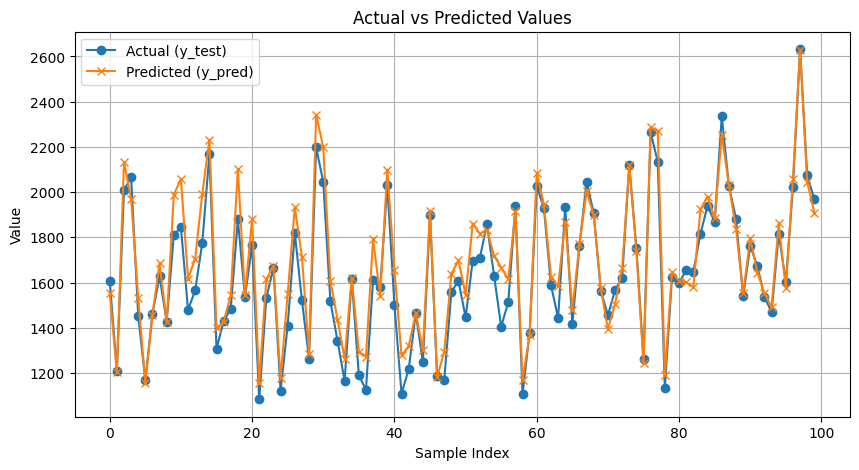

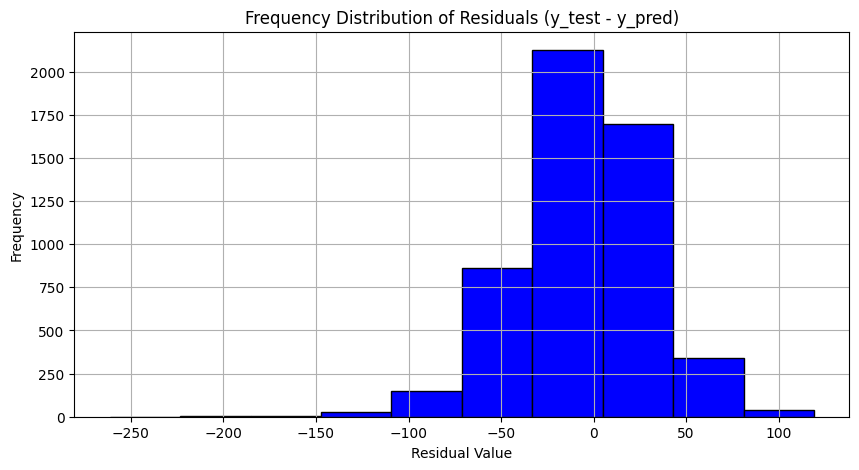

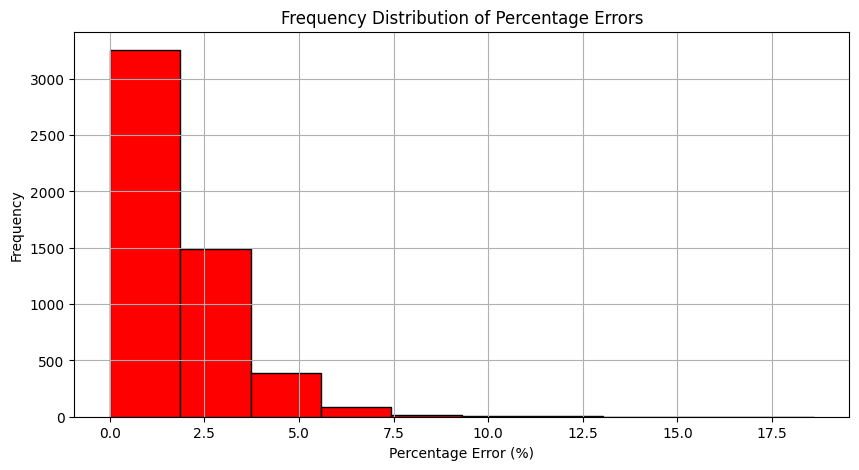

In [264]:
plot_regression_error_metrics_scaled(y_test, lstm_pred, bins=10, show = '100', scaler = target_scaler)

In [279]:
y_test_original = target_scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_pred_original = target_scaler.inverse_transform(lstm_pred.reshape(-1, 1))
lstm_rmse = np.sqrt(mean_squared_error(y_test_original, lstm_pred_original))
print("LSTM RMSE (original scale):", lstm_rmse)

LSTM RMSE (original scale): 36.13361061074325


In [265]:
def build_gru_model_light(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units', min_value=16, max_value=128, step=16),
                  input_shape=(X_seq.shape[1], X_seq.shape[2])))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4]),
        clipnorm=1.0
    )
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [266]:
tuner_gru = kt.RandomSearch(build_gru_model_light, objective='val_loss', max_trials=10, executions_per_trial=1, directory='dir', project_name='build_gru_model_light')
tuner_gru.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Trial 10 Complete [00h 02m 18s]
val_loss: 0.00032097406801767647

Best val_loss So Far: 0.00032097406801767647
Total elapsed time: 00h 23m 04s


In [267]:
best_gru = tuner_gru.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 



In [271]:
gru_pred = best_gru.predict(X_test)
gru_rmse = np.sqrt(np.mean((gru_pred.flatten() - y_test)**2))
print("Best GRU RMSE:", gru_rmse)

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best GRU RMSE: 0.015018764082347709


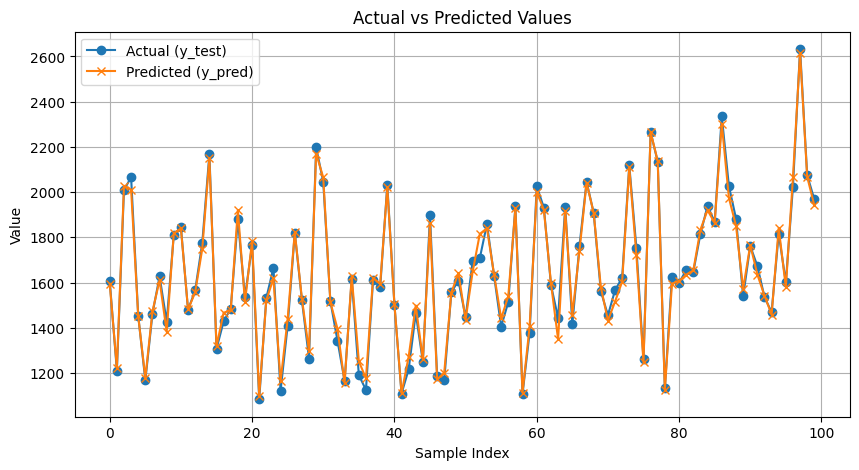

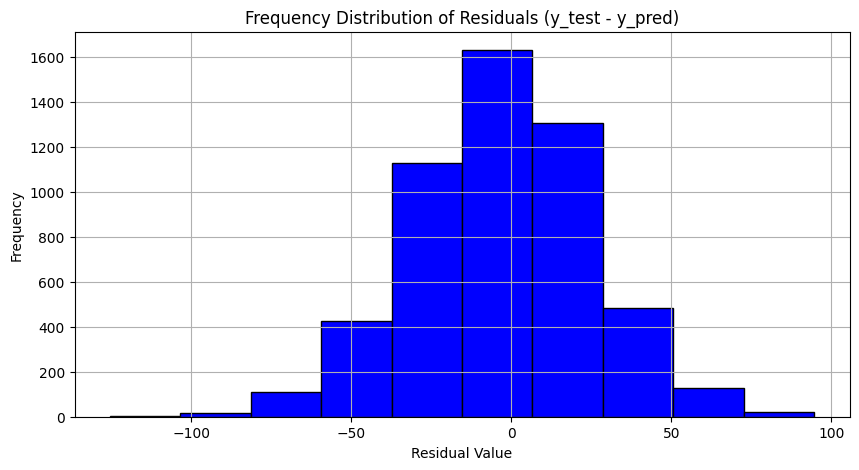

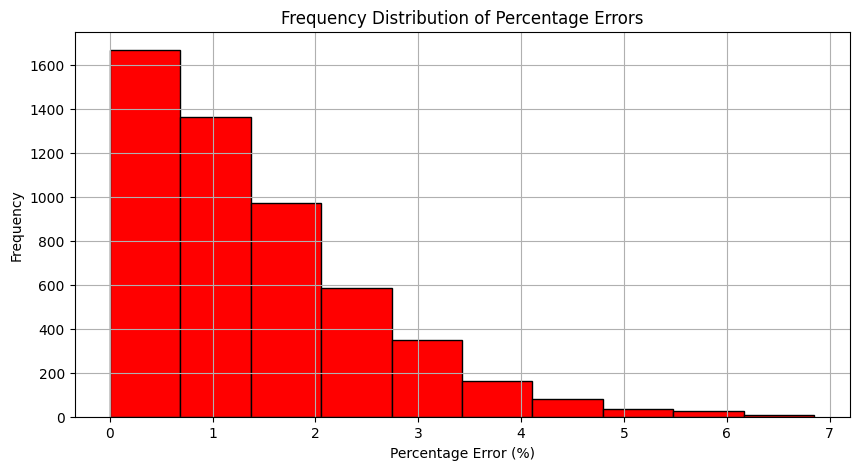

In [272]:
plot_regression_error_metrics_scaled(y_test, gru_pred, bins=10, show = '100', scaler = target_scaler)

In [280]:
y_test_original = target_scaler.inverse_transform(y_test.reshape(-1, 1))
gru_pred_original = target_scaler.inverse_transform(gru_pred.reshape(-1, 1))
gru_rmse = np.sqrt(mean_squared_error(y_test_original, gru_pred_original))
print("GRU RMSE (original scale):", gru_rmse)

GRU RMSE (original scale): 28.115129523913197


In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [146]:
def build_gru_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units1', min_value=32, max_value=128, step=32),
                  return_sequences=True,
                  input_shape=(X_seq.shape[1], X_seq.shape[2])))
    model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.2, step=0.01)))
    model.add(GRU(units=hp.Int('units2', min_value=32, max_value=128, step=32),
                  return_sequences=False))
    model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout2', min_value=0.0, max_value=0.2, step=0.01)))
    model.add(Dense(units=hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4]),
        clipnorm=1.0
    )
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


In [148]:
tuner_gru = kt.RandomSearch(build_gru_model, objective='val_loss', max_trials=10, executions_per_trial=1, directory='my_dir', project_name='gru_tuning')
tuner_gru.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
best_gru = tuner_gru.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 03m 47s]
val_loss: 0.00019157440692652017

Best val_loss So Far: 9.38994053285569e-05
Total elapsed time: 00h 37m 44s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [149]:
gru_pred = best_gru.predict(X_test)
gru_rmse = np.sqrt(np.mean((gru_pred.flatten() - y_test)**2))
print("Best GRU RMSE:", gru_rmse)

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Best GRU RMSE: 0.009690171588627498


In [150]:
y_test_original = target_scaler.inverse_transform(y_test.reshape(-1, 1))
gru_pred_original = target_scaler.inverse_transform(gru_pred.reshape(-1, 1))
gru_rmse = np.sqrt(mean_squared_error(y_test_original, gru_pred_original))
print("GRU RMSE (original scale):", gru_rmse)

GRU RMSE (original scale): 18.13999979264049


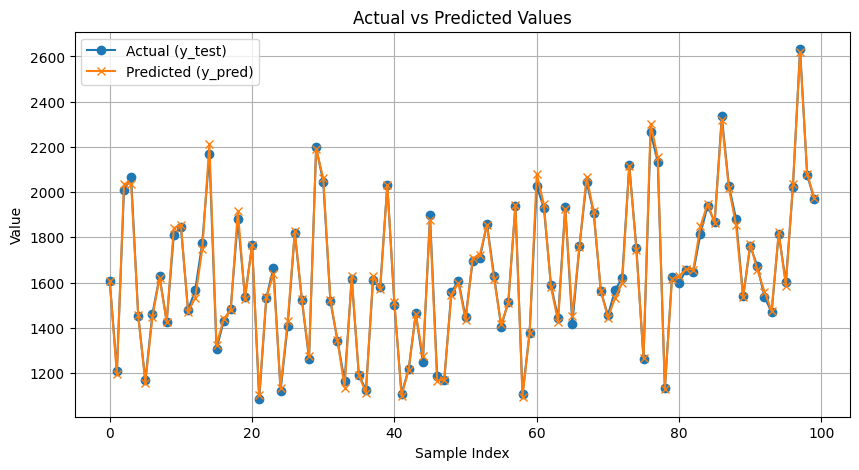

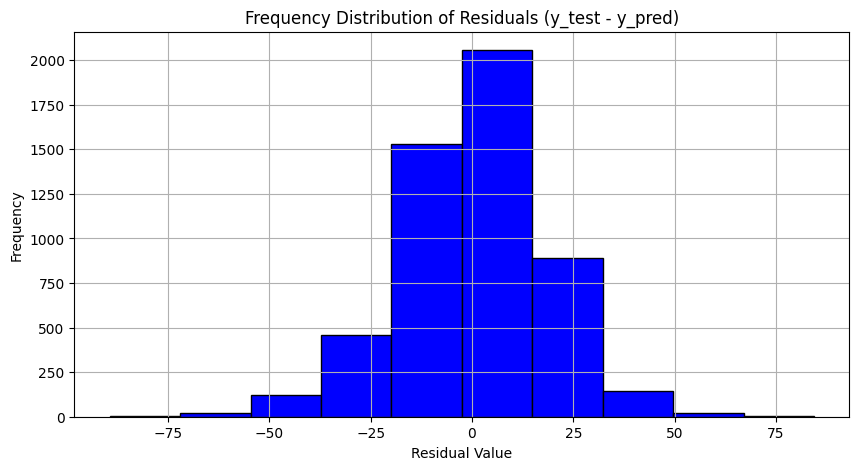

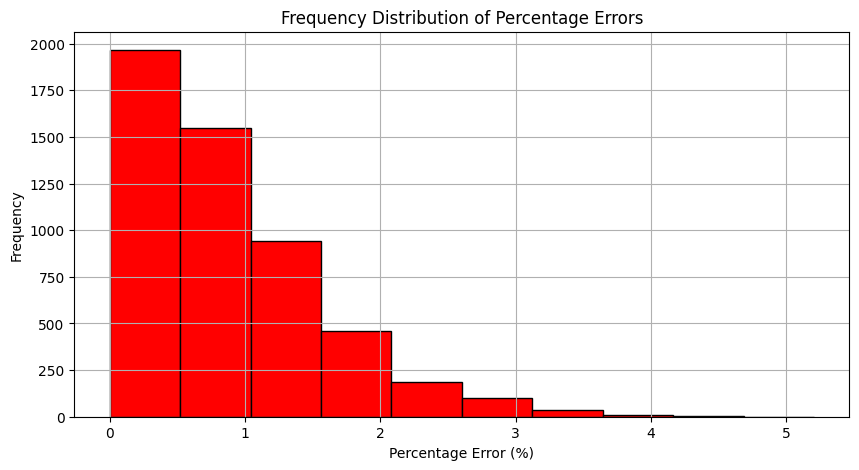

In [151]:
plot_regression_error_metrics_scaled(y_test, gru_pred, bins=10, show = '100', scaler = target_scaler)

In [ ]:
# this is the final model that we have lets see some more metrics for error to know how well the model is performing 

In [152]:
from sklearn.metrics import mean_absolute_error, r2_score

In [154]:
gru_rmse = np.sqrt(mean_squared_error(y_test_original, gru_pred_original))
gru_mae = mean_absolute_error(y_test_original, gru_pred_original)
gru_mape = np.mean(np.abs((y_test_original - gru_pred_original) / y_test_original)) * 100
gru_r2 = r2_score(y_test_original, gru_pred_original)

In [155]:
print("GRU RMSE (original scale):", gru_rmse)
print("GRU MAE (original scale):", gru_mae)
print("GRU MAPE (original scale):", gru_mape, "%")
print("GRU R^2 (original scale):", gru_r2)

GRU RMSE (original scale): 18.13999979264049
GRU MAE (original scale): 14.019601163842346
GRU MAPE (original scale): 0.8764931975977954 %
GRU R^2 (original scale): 0.9969527385413653


In [157]:
max_prediction = np.max(gru_pred_original)
min_prediction = np.min(gru_pred_original)

In [158]:
print("Max Prediction (original scale):", max_prediction)
print("Min Prediction (original scale):", min_prediction)

Max Prediction (original scale): 2808.0225
Min Prediction (original scale): 967.85504


In [ ]:
#below is the max and min for the whole df and not only the test set 

In [161]:
print("Max original value (original scale):",np.max(df['actual_performance(10000 kW)']))
print("Min original value (original scale):", np.min(df['actual_performance(10000 kW)']))

Max original value (original scale): 2827
Min original value (original scale): 955


In [197]:
best_gru.save('best_gru_model.keras',include_optimizer=False)

In [211]:
import joblib

In [214]:
joblib.dump(scaler, 'feature_scaler.pkl')

['feature_scaler.pkl']

In [215]:
joblib.dump(target_scaler, 'target_scaler.pkl')

['target_scaler.pkl']

In [173]:
df_reduced.columns

Index(['actual_performance(10000 kW)', 'kyoto_temperature', 'kyoto_humidity',
       'kyoto_wind_speed', 'wakayama_temperature', 'wakayama_humidity',
       'wakayama_wind_speed', 'toyooka_temperature', 'toyooka_humidity',
       'toyooka_wind_speed', 'kobe_temperature', 'kobe_humidity',
       'kobe_wind_speed', 'shionomisaki_temperature', 'shionomisaki_humidity',
       'shionomisaki_wind_speed', 'osaka_temperature', 'osaka_humidity',
       'osaka_wind_speed', 'hikone_temperature', 'hikone_humidity',
       'hikone_wind_speed', 'is_holiday'],
      dtype='object')

In [185]:
def add_is_holiday_and_filter(row, required_columns):
    row_copy = row.copy()
    if 'is_holiday' not in row_copy.index:
        row_copy['is_holiday'] = 1 if jpholiday.is_holiday(row_copy.name) else 0
    filtered_row = row_copy.reindex(required_columns)
    return filtered_row

In [186]:
def print_metrics(metrics):
    print("Evaluation Metrics:")
    print(f"Original Value      : {metrics['original']}")
    print(f"Predicted Value     : {metrics['predicted']}")
    print(f"Absolute Error      : {metrics['absolute_error']}")
    print(f"Percentage Error    : {metrics['percentage_error']:.2f}%" if metrics['percentage_error'] is not None else "Percentage Error    : N/A")
    print(f"RMSE                : {metrics['rmse']}")
    print(f"MAE                 : {metrics['mae']}")

In [187]:
def evaluate_row(df, row_index, model, scaler, target_scaler, look_back=24, target_col='actual_performance(10000 kW)'):
    if row_index < look_back:
        raise ValueError("row_index must be at least as large as look_back")
    
    original_value = df.iloc[row_index][target_col]
    #print(f"Original Target Value (Row {row_index}): {original_value}")
    sample_df = df.iloc[row_index - look_back: row_index].copy()
    processed_sample = sample_df.apply(lambda row: add_is_holiday_and_filter(row, df.columns), axis=1)
    if isinstance(processed_sample, pd.DataFrame):
        processed_sample_df = processed_sample
    else:
        processed_sample_df = pd.DataFrame(processed_sample.tolist(), index=sample_df.index, columns=df.columns)
    
    sample_array_scaled = scaler.transform(processed_sample_df)
    sample_array_scaled = sample_array_scaled.reshape(1, look_back, processed_sample_df.shape[1])
    
    pred_scaled = model.predict(sample_array_scaled)
    pred_original = target_scaler.inverse_transform(pred_scaled)
    predicted_value = pred_original.flatten()[0]
    #print(f"Predicted Target Value (Row {row_index}): {predicted_value}")
    abs_error = np.abs(predicted_value - original_value)
    perc_error = (abs_error / np.abs(original_value)) * 100 if original_value != 0 else None
    rmse = abs_error
    mae = abs_error
    
    return {
        'original': original_value,
        'predicted': predicted_value,
        'absolute_error': abs_error,
        'percentage_error': perc_error,
        'rmse': rmse,
        'mae': mae
    }
  

In [188]:
metrics = evaluate_row(df_reduced, 2896, best_gru, scaler, target_scaler, look_back=24, target_col='actual_performance(10000 kW)')

Original Target Value (Row 2896): 1285.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Target Value (Row 2896): 1303.2144775390625


In [190]:
print_metrics(metrics)

Evaluation Metrics:
Original Value      : 1285.0
Predicted Value     : 1303.2144775390625
Absolute Error      : 18.2144775390625
Percentage Error    : 1.42%
RMSE                : 18.2144775390625
MAE                 : 18.2144775390625


In [220]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import jpholiday

In [227]:
class GRUModelPredictor:
    def __init__(self, model_path:str = 'best_model_gru.keras' , 
                 target_column:int = 1000, look_back:int = 24,
                 feature_scalar = None,
                 target_scalar = None):
        self.model_path = model_path
        self.required_columns = self.load_required_columns()
        self.target_column = target_column
        self.look_back = look_back
        self.model = self._load_model()
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

    
    def load_required_columns(self):
        return [
            'actual_performance(10000 kW)', 'kyoto_temperature', 'kyoto_humidity',
            'kyoto_wind_speed', 'wakayama_temperature', 'wakayama_humidity',
            'wakayama_wind_speed', 'toyooka_temperature', 'toyooka_humidity',
            'toyooka_wind_speed', 'kobe_temperature', 'kobe_humidity',
            'kobe_wind_speed', 'shionomisaki_temperature', 'shionomisaki_humidity',
            'shionomisaki_wind_speed', 'osaka_temperature', 'osaka_humidity',
            'osaka_wind_speed', 'hikone_temperature', 'hikone_humidity',
            'hikone_wind_speed', 'is_holiday'
        ]
    def _load_model(self):
        """Load the Keras model from the specified path."""
        model = load_model(self.model_path)
        print(f"Model loaded from {self.model_path}")
        return model

    def _add_is_holiday_and_filter(self, row):
        row_copy = row.copy()
        if 'is_holiday' not in row_copy.index:
            row_copy['is_holiday'] = 1 if jpholiday.is_holiday(row_copy.name) else 0
        filtered_row = row_copy.reindex(self.required_columns)
        return filtered_row

    def _preprocess(self, df):
        missing_cols = [col for col in self.required_columns if col not in df.columns]
        if missing_cols:
            raise ValueError(f"The following required columns are missing from the input data: {missing_cols}")
        df_processed = df.apply(self._add_is_holiday_and_filter, axis=1)
        features_scaled = self.feature_scaler.fit_transform(df_processed)
        target_scaled = self.target_scaler.fit_transform(df[[self.target_column]])

        return features_scaled, target_scaled

    def predict(self, df):
        features_scaled, _ = self._preprocess(df)
        if len(features_scaled) < self.look_back:
            raise ValueError(f"Input data must have at least {self.look_back} rows.")

        X = []
        for i in range(self.look_back, len(features_scaled)):
            X.append(features_scaled[i - self.look_back:i])
        X = np.array(X)
        predictions_scaled = self.model.predict(X)
        predictions = self.target_scaler.inverse_transform(predictions_scaled)

        return predictions

    def evaluate_row(self, df, row_index):
        if row_index < self.look_back:
            raise ValueError("row_index must be at least as large as look_back")

        original_value = df.iloc[row_index][self.target_column]
        sample_df = df.iloc[row_index - self.look_back: row_index].copy()
        features_scaled, _ = self._preprocess(sample_df)
        sample_array_scaled = features_scaled.reshape(1, self.look_back, len(self.required_columns))

        pred_scaled = self.model.predict(sample_array_scaled)
        pred_original = self.target_scaler.inverse_transform(pred_scaled)
        predicted_value = pred_original.flatten()[0]

        abs_error = np.abs(predicted_value - original_value)
        perc_error = (abs_error / np.abs(original_value)) * 100 if original_value != 0 else None
        rmse = np.sqrt(np.mean(abs_error**2))
        mae = np.mean(abs_error)

        return {
            'original': original_value,
            'predicted': predicted_value,
            'absolute_error': abs_error,
            'percentage_error': perc_error,
            'rmse': rmse,
            'mae': mae
        }

    def print_metrics(self, metrics):
        print("Evaluation Metrics:")
        print(f"Original Value      : {metrics['original']}")
        print(f"Predicted Value     : {metrics['predicted']}")
        print(f"Absolute Error      : {metrics['absolute_error']}")
        if metrics['percentage_error'] is not None:
            print(f"Percentage Error    : {metrics['percentage_error']:.2f}%")
        else:
            print("Percentage Error    : N/A")
        print(f"RMSE                : {metrics['rmse']}")
        print(f"MAE                 : {metrics['mae']}")

    def display_prediction(self, df, predictions=None, bins=10, show='all'):
        _, target_scaled = self._preprocess(df)
        if len(target_scaled) < self.look_back:
            raise ValueError(f"Input data must have at least {self.look_back} rows.")
        y_test_scaled = target_scaled[self.look_back:]
        y_test = self.target_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
        if predictions is None:
            predictions = self.predict(df)
        else:
            predictions = np.array(predictions)
        if predictions.shape[0] != y_test.shape[0]:
            raise ValueError("Number of predictions does not match number of samples in y_test.")
        residuals = y_test - predictions.flatten()
        percentage_error = np.abs(residuals) / (np.abs(y_test) + 1e-6) * 100

        # Plot 1: Actual vs. Predicted values
        plt.figure(figsize=(10, 5))
        if show == 'all':
            plt.plot(y_test, label='Actual (y_test)', marker='o')
            plt.plot(predictions, label='Predicted (y_pred)', marker='x')
        else:
            try:
                show_int = int(show)
            except Exception:
                show_int = len(y_test)
            plt.plot(y_test[:show_int], label='Actual (y_test)', marker='o')
            plt.plot(predictions[:show_int], label='Predicted (y_pred)', marker='x')
        plt.title("Actual vs. Predicted Values")
        plt.xlabel("Sample Index")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plot 2: Histogram of Residuals
        plt.figure(figsize=(10, 5))
        plt.hist(residuals, bins=bins, edgecolor='black', color='blue')
        plt.title("Frequency Distribution of Residuals (y_test - y_pred)")
        plt.xlabel("Residual Value")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Plot 3: Histogram of Percentage Errors
        plt.figure(figsize=(10, 5))
        plt.hist(percentage_error, bins=bins, edgecolor='black', color='red')
        plt.title("Frequency Distribution of Percentage Errors")
        plt.xlabel("Percentage Error (%)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()


In [216]:
model_path = 'best_gru_model.keras'
target_column = "actual_performance(10000 kW)"
look_back = 24
feature_scaler = joblib.load('feature_scaler.pkl')
target_scaler = joblib.load('target_scaler.pkl')

In [228]:
predictor = GRUModelPredictor(model_path, target_column, look_back,
                              feature_scaler, target_scaler)

Model loaded from best_gru_model.keras


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [230]:
prediction = predictor.predict(df_reduced)

821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


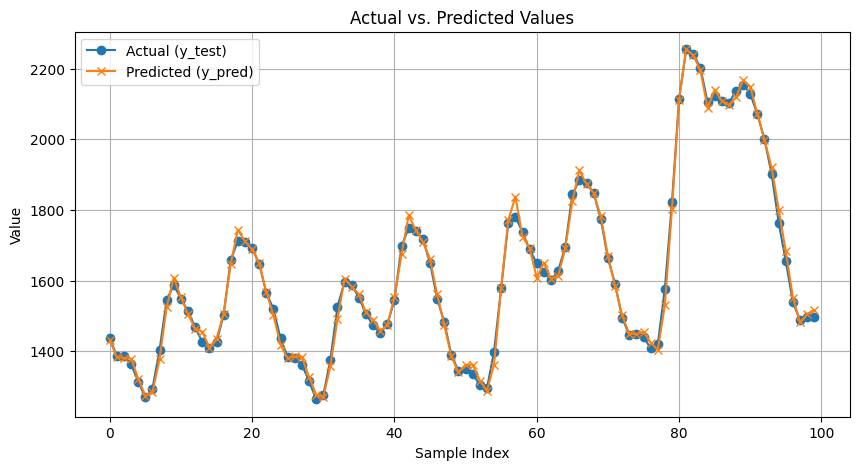

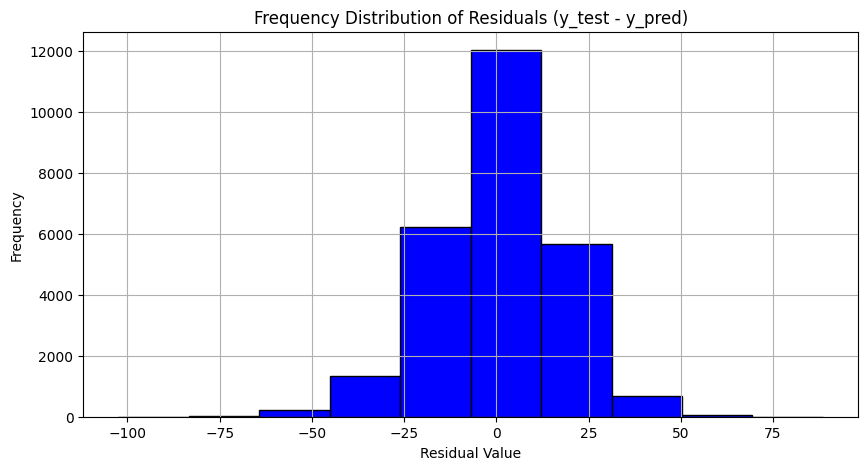

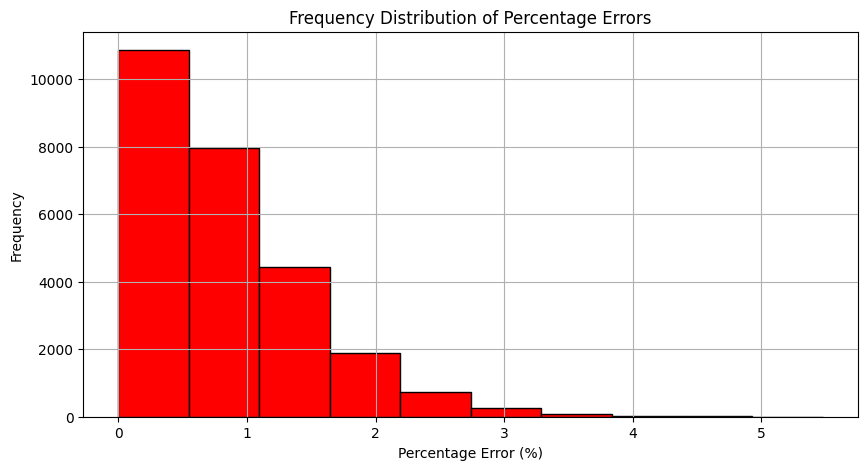

In [233]:
predictor.display_prediction(df_reduced, predictions=prediction, bins=10, show=100)

In [226]:
row_index = 2896
metrics = predictor.evaluate_row(df_reduced, row_index)
predictor.print_metrics(metrics)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Evaluation Metrics:
Original Value      : 1285.0
Predicted Value     : 1269.505126953125
Absolute Error      : 15.494873046875
Percentage Error    : 1.21%
RMSE                : 15.494873046875
MAE                 : 15.494873046875


In [237]:
df_reduced.to_csv('power_generation_weather_final.csv')